# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

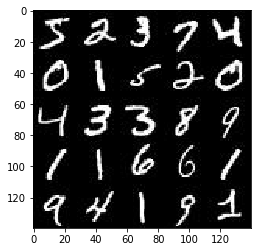

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

In [4]:
# import matplotlib
# matplotlib.__version__
# !pip install -U matplotlib==2.0.2

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

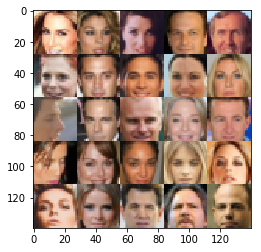

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
import tensorflow.contrib.slim as slim

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/jsingh/anaconda3/envs/cv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [8]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32,[None,image_width,image_height,image_channels])
    input_z = tf.placeholder(tf.float32,[None,z_dim])
    learning_rate = tf.placeholder(tf.float32)
    return input_real,input_z,learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [9]:
def discriminator(images, reuse=False,alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator",reuse=reuse):
        # input_shape : (32,32,3)
        net = slim.conv2d(images,64,5,stride=2,activation_fn=None) # (32,32,16)
        net = tf.maximum(alpha*net,net)
        net = slim.conv2d(net,128,5,stride=2,activation_fn=None)
        net = slim.batch_norm(net)
        net = tf.maximum(alpha*net,net)
        net = slim.conv2d(net,256,5,stride=2,activation_fn=None)
        net = slim.batch_norm(net)
        net = tf.maximum(alpha*net,net)
        net = slim.flatten(net)
        logits = slim.fully_connected(net,1,activation_fn=None)
        out = tf.sigmoid(logits)
    return out,logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [92]:
def generator(z,out_channel_dim,is_train=True,alpha=.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    with tf.variable_scope("generator",reuse=not is_train):
        net = slim.fully_connected(z,4*4*512,activation_fn=None)
        net = tf.reshape(net,[-1,4,4,512])
        net = slim.batch_norm(net,is_training=is_train)
        net = tf.maximum(alpha*net,net)    # (4,4,)
        net = tf.layers.conv2d_transpose(net,256,5,strides=2)
        net = slim.batch_norm(net,is_training=is_train)
        net = tf.maximum(alpha*net,net)    # (8,8,)
        net = tf.layers.conv2d_transpose(net,128,5,strides=2)
        net = slim.batch_norm(net,is_training=is_train)         
        net = tf.maximum(alpha*net,net)    # (16,16,)

        net = tf.layers.conv2d_transpose(net,out_channel_dim,5,strides=2) #(32,32,output_channel_dim)
        net = tf.image.resize_images(net,[28,28]) # (28,28,C)

        out = .5*tf.tanh(net)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [72]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_out = generator(input_z,out_channel_dim,is_train=True)
    d_out_real,d_logits_real = discriminator(input_real,reuse=False)
    d_out_fake,d_logits_fake = discriminator(gen_out,reuse=True)
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logits_real)
                                                          ,logits=d_logits_real))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_logits_fake)
                                                          ,logits=d_logits_fake))
    d_loss = d_loss_real+d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logits_fake)
                                                     ,logits=d_logits_fake))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [73]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
   # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [74]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [89]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # print parameters
    DISPLAY_STEP = 100
    GEN_DISPLAY_STEP = 10*DISPLAY_STEP
    
    # TODO: Build Model
    step = 0
    im_width , im_height , im_channels = data_shape[1:]
    
    input_real,input_z,lr = model_inputs(im_width,im_height,im_channels,z_dim)
    d_loss,g_loss = model_loss(input_real,input_z,im_channels)
    d_opt,g_opt = model_opt(d_loss,g_loss,lr,beta1)
     
    with tf.Session() as sess:    
        sess.run([tf.global_variables_initializer(),tf.local_variables_initializer()])
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                step += 1 
                # TODO: Train Model
                
                # getting batch data
                batch_real = batch_images
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # training the model
                _,d_l = sess.run([d_opt,d_loss],feed_dict={input_real:batch_real,input_z:batch_z,
                                                           lr:learning_rate})
                _,g_l = sess.run([g_opt,g_loss],feed_dict={input_real:batch_real,input_z:batch_z
                                                           ,lr:learning_rate})
                
                if step % DISPLAY_STEP == 0 :
                    print ("Epoch : {}/{} ... Step : {} ... d_loss : {} ... g_loss : {}"
                           .format(epoch_i+1,epoch_count,step,d_l,g_l))
                
                if step % GEN_DISPLAY_STEP == 0 :
                    n_images = 25
                    show_generator_output(sess,n_images,input_z,im_channels,data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch : 1/10 ... Step : 10 ... d_loss : 0.9336976408958435 ... g_loss : 7.311212539672852
Epoch : 1/10 ... Step : 20 ... d_loss : 0.3639373183250427 ... g_loss : 3.2976484298706055
Epoch : 1/10 ... Step : 30 ... d_loss : 0.17301833629608154 ... g_loss : 4.143669128417969
Epoch : 1/10 ... Step : 40 ... d_loss : 0.013400103896856308 ... g_loss : 6.166452407836914
Epoch : 1/10 ... Step : 50 ... d_loss : 0.029078524559736252 ... g_loss : 7.749451637268066
Epoch : 1/10 ... Step : 60 ... d_loss : 1.6513876914978027 ... g_loss : 9.911873817443848
Epoch : 1/10 ... Step : 70 ... d_loss : 0.1284271776676178 ... g_loss : 12.684028625488281
Epoch : 1/10 ... Step : 80 ... d_loss : 7.0270915031433105 ... g_loss : 4.399494647979736
Epoch : 1/10 ... Step : 90 ... d_loss : 0.1814710795879364 ... g_loss : 6.094439506530762
Epoch : 1/10 ... Step : 100 ... d_loss : 1.3318357467651367 ... g_loss : 0.6794193983078003


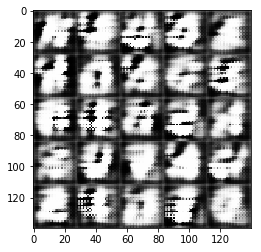

Epoch : 1/10 ... Step : 110 ... d_loss : 1.397844910621643 ... g_loss : 3.883117198944092
Epoch : 1/10 ... Step : 120 ... d_loss : 1.729637861251831 ... g_loss : 0.9159450531005859
Epoch : 1/10 ... Step : 130 ... d_loss : 0.9159771203994751 ... g_loss : 2.8071227073669434
Epoch : 1/10 ... Step : 140 ... d_loss : 0.7850979566574097 ... g_loss : 2.634237289428711
Epoch : 1/10 ... Step : 150 ... d_loss : 0.7400979995727539 ... g_loss : 3.4742345809936523
Epoch : 1/10 ... Step : 160 ... d_loss : 1.6995909214019775 ... g_loss : 0.6127923727035522
Epoch : 1/10 ... Step : 170 ... d_loss : 1.0672526359558105 ... g_loss : 2.419649600982666
Epoch : 1/10 ... Step : 180 ... d_loss : 2.686013698577881 ... g_loss : 0.673509955406189
Epoch : 1/10 ... Step : 190 ... d_loss : 1.4837532043457031 ... g_loss : 4.456912040710449
Epoch : 1/10 ... Step : 200 ... d_loss : 0.5718165636062622 ... g_loss : 3.2093491554260254


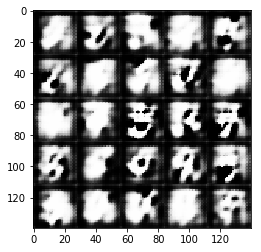

Epoch : 1/10 ... Step : 210 ... d_loss : 1.0083123445510864 ... g_loss : 2.3459014892578125
Epoch : 1/10 ... Step : 220 ... d_loss : 2.623124361038208 ... g_loss : 1.6884279251098633
Epoch : 1/10 ... Step : 230 ... d_loss : 1.198453426361084 ... g_loss : 2.7551279067993164
Epoch : 1/10 ... Step : 240 ... d_loss : 0.45371878147125244 ... g_loss : 3.0702357292175293
Epoch : 1/10 ... Step : 250 ... d_loss : 1.5990288257598877 ... g_loss : 1.3336373567581177
Epoch : 1/10 ... Step : 260 ... d_loss : 0.5275869369506836 ... g_loss : 2.115786552429199
Epoch : 1/10 ... Step : 270 ... d_loss : 1.4636509418487549 ... g_loss : 3.59511661529541
Epoch : 1/10 ... Step : 280 ... d_loss : 0.9516904354095459 ... g_loss : 3.3252086639404297
Epoch : 1/10 ... Step : 290 ... d_loss : 0.7114964723587036 ... g_loss : 3.264331817626953
Epoch : 1/10 ... Step : 300 ... d_loss : 0.8348485231399536 ... g_loss : 2.270519256591797


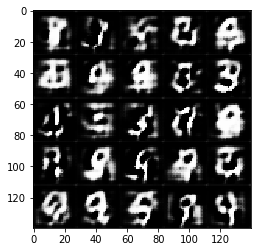

Epoch : 1/10 ... Step : 310 ... d_loss : 1.294409155845642 ... g_loss : 1.336060881614685
Epoch : 1/10 ... Step : 320 ... d_loss : 0.921809196472168 ... g_loss : 5.333911895751953
Epoch : 1/10 ... Step : 330 ... d_loss : 0.895397424697876 ... g_loss : 2.6435799598693848
Epoch : 1/10 ... Step : 340 ... d_loss : 0.8738511204719543 ... g_loss : 3.386038064956665
Epoch : 1/10 ... Step : 350 ... d_loss : 0.620734691619873 ... g_loss : 3.7486414909362793
Epoch : 1/10 ... Step : 360 ... d_loss : 1.0144203901290894 ... g_loss : 1.469957947731018
Epoch : 1/10 ... Step : 370 ... d_loss : 0.39007750153541565 ... g_loss : 3.1703720092773438
Epoch : 1/10 ... Step : 380 ... d_loss : 1.1083438396453857 ... g_loss : 1.4196758270263672
Epoch : 1/10 ... Step : 390 ... d_loss : 0.8865296840667725 ... g_loss : 1.097640872001648
Epoch : 1/10 ... Step : 400 ... d_loss : 1.1189064979553223 ... g_loss : 1.8318194150924683


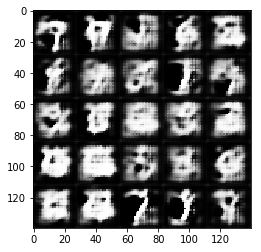

Epoch : 1/10 ... Step : 410 ... d_loss : 1.3792486190795898 ... g_loss : 3.445786952972412
Epoch : 1/10 ... Step : 420 ... d_loss : 1.1093313694000244 ... g_loss : 2.5241875648498535
Epoch : 1/10 ... Step : 430 ... d_loss : 0.9715054035186768 ... g_loss : 3.209750175476074
Epoch : 1/10 ... Step : 440 ... d_loss : 1.544184684753418 ... g_loss : 5.252941608428955
Epoch : 1/10 ... Step : 450 ... d_loss : 0.4542277455329895 ... g_loss : 2.635376453399658
Epoch : 1/10 ... Step : 460 ... d_loss : 1.1781299114227295 ... g_loss : 3.10211443901062
Epoch : 1/10 ... Step : 470 ... d_loss : 1.722873330116272 ... g_loss : 0.3512219488620758
Epoch : 1/10 ... Step : 480 ... d_loss : 1.0127923488616943 ... g_loss : 2.341762065887451
Epoch : 1/10 ... Step : 490 ... d_loss : 1.004692554473877 ... g_loss : 2.802274227142334
Epoch : 1/10 ... Step : 500 ... d_loss : 1.08346426486969 ... g_loss : 1.052732229232788


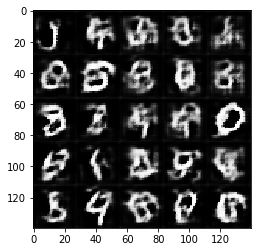

Epoch : 1/10 ... Step : 510 ... d_loss : 0.8115843534469604 ... g_loss : 2.279780864715576
Epoch : 1/10 ... Step : 520 ... d_loss : 1.4663351774215698 ... g_loss : 0.38215139508247375
Epoch : 1/10 ... Step : 530 ... d_loss : 0.8898907899856567 ... g_loss : 2.384796380996704
Epoch : 1/10 ... Step : 540 ... d_loss : 1.2728767395019531 ... g_loss : 1.1691789627075195
Epoch : 1/10 ... Step : 550 ... d_loss : 0.8470571041107178 ... g_loss : 2.0264289379119873
Epoch : 1/10 ... Step : 560 ... d_loss : 1.5382022857666016 ... g_loss : 1.50447678565979
Epoch : 1/10 ... Step : 570 ... d_loss : 1.6164087057113647 ... g_loss : 0.7648814916610718
Epoch : 1/10 ... Step : 580 ... d_loss : 1.1318968534469604 ... g_loss : 1.7330741882324219
Epoch : 1/10 ... Step : 590 ... d_loss : 1.6620967388153076 ... g_loss : 0.4128282070159912
Epoch : 1/10 ... Step : 600 ... d_loss : 1.0595319271087646 ... g_loss : 1.251063346862793


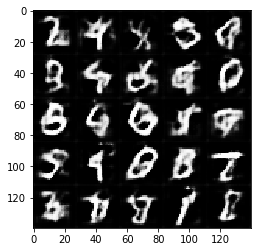

Epoch : 1/10 ... Step : 610 ... d_loss : 1.7486302852630615 ... g_loss : 0.644080400466919
Epoch : 1/10 ... Step : 620 ... d_loss : 1.0599135160446167 ... g_loss : 1.5116643905639648
Epoch : 1/10 ... Step : 630 ... d_loss : 1.2168996334075928 ... g_loss : 0.9227011203765869
Epoch : 1/10 ... Step : 640 ... d_loss : 0.8925243020057678 ... g_loss : 1.7199068069458008
Epoch : 1/10 ... Step : 650 ... d_loss : 1.147553563117981 ... g_loss : 1.5625324249267578
Epoch : 1/10 ... Step : 660 ... d_loss : 0.9455957412719727 ... g_loss : 1.318260669708252
Epoch : 1/10 ... Step : 670 ... d_loss : 1.1988613605499268 ... g_loss : 2.234072685241699
Epoch : 1/10 ... Step : 680 ... d_loss : 0.8029910326004028 ... g_loss : 2.58685302734375
Epoch : 1/10 ... Step : 690 ... d_loss : 0.9784906506538391 ... g_loss : 2.1536436080932617
Epoch : 1/10 ... Step : 700 ... d_loss : 0.847655177116394 ... g_loss : 2.493992328643799


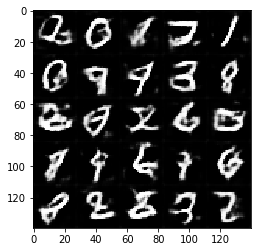

Epoch : 1/10 ... Step : 710 ... d_loss : 1.828971266746521 ... g_loss : 0.4550655782222748
Epoch : 1/10 ... Step : 720 ... d_loss : 1.6097397804260254 ... g_loss : 0.8204618692398071
Epoch : 1/10 ... Step : 730 ... d_loss : 1.0887187719345093 ... g_loss : 2.7606587409973145
Epoch : 1/10 ... Step : 740 ... d_loss : 0.963829517364502 ... g_loss : 1.1489312648773193
Epoch : 1/10 ... Step : 750 ... d_loss : 0.8147303462028503 ... g_loss : 1.6449116468429565
Epoch : 1/10 ... Step : 760 ... d_loss : 1.2644479274749756 ... g_loss : 1.245898962020874
Epoch : 1/10 ... Step : 770 ... d_loss : 2.3815462589263916 ... g_loss : 0.7054839730262756
Epoch : 1/10 ... Step : 780 ... d_loss : 1.0985352993011475 ... g_loss : 1.199989914894104
Epoch : 1/10 ... Step : 790 ... d_loss : 0.8132576942443848 ... g_loss : 2.0180912017822266
Epoch : 1/10 ... Step : 800 ... d_loss : 1.3107726573944092 ... g_loss : 2.2561357021331787


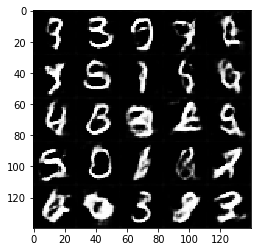

Epoch : 1/10 ... Step : 810 ... d_loss : 1.0638477802276611 ... g_loss : 1.8573417663574219
Epoch : 1/10 ... Step : 820 ... d_loss : 1.1857035160064697 ... g_loss : 0.7945778369903564
Epoch : 1/10 ... Step : 830 ... d_loss : 1.0588810443878174 ... g_loss : 1.7995920181274414
Epoch : 1/10 ... Step : 840 ... d_loss : 0.7991496920585632 ... g_loss : 2.8622632026672363
Epoch : 1/10 ... Step : 850 ... d_loss : 1.6774568557739258 ... g_loss : 0.7666798233985901
Epoch : 1/10 ... Step : 860 ... d_loss : 1.1381988525390625 ... g_loss : 1.804802656173706
Epoch : 1/10 ... Step : 870 ... d_loss : 1.1858789920806885 ... g_loss : 1.1012569665908813
Epoch : 1/10 ... Step : 880 ... d_loss : 1.517936110496521 ... g_loss : 1.2802445888519287
Epoch : 1/10 ... Step : 890 ... d_loss : 0.6709963083267212 ... g_loss : 2.9474101066589355
Epoch : 1/10 ... Step : 900 ... d_loss : 1.611269474029541 ... g_loss : 0.9779760837554932


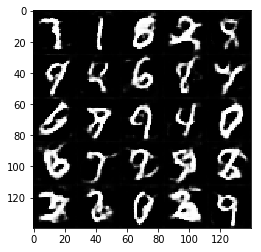

Epoch : 1/10 ... Step : 910 ... d_loss : 0.7024667263031006 ... g_loss : 2.1487045288085938
Epoch : 1/10 ... Step : 920 ... d_loss : 2.2447454929351807 ... g_loss : 1.576002836227417
Epoch : 1/10 ... Step : 930 ... d_loss : 0.914207398891449 ... g_loss : 4.081455230712891
Epoch : 2/10 ... Step : 940 ... d_loss : 1.1459710597991943 ... g_loss : 1.118256688117981
Epoch : 2/10 ... Step : 950 ... d_loss : 0.8255268335342407 ... g_loss : 2.19569730758667
Epoch : 2/10 ... Step : 960 ... d_loss : 0.8839629292488098 ... g_loss : 2.1204190254211426
Epoch : 2/10 ... Step : 970 ... d_loss : 1.1559247970581055 ... g_loss : 3.868286609649658
Epoch : 2/10 ... Step : 980 ... d_loss : 0.7506850957870483 ... g_loss : 1.4702450037002563
Epoch : 2/10 ... Step : 990 ... d_loss : 1.1529264450073242 ... g_loss : 3.8402624130249023
Epoch : 2/10 ... Step : 1000 ... d_loss : 1.6934853792190552 ... g_loss : 0.965009331703186


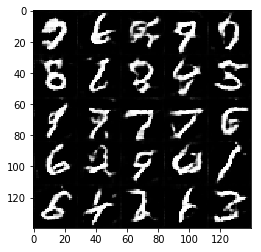

Epoch : 2/10 ... Step : 1010 ... d_loss : 1.4895522594451904 ... g_loss : 0.8702187538146973
Epoch : 2/10 ... Step : 1020 ... d_loss : 0.6686224937438965 ... g_loss : 2.087233066558838
Epoch : 2/10 ... Step : 1030 ... d_loss : 1.863518476486206 ... g_loss : 0.7395287156105042
Epoch : 2/10 ... Step : 1040 ... d_loss : 0.7950794696807861 ... g_loss : 2.6093170642852783
Epoch : 2/10 ... Step : 1050 ... d_loss : 0.9540974497795105 ... g_loss : 2.0647072792053223
Epoch : 2/10 ... Step : 1060 ... d_loss : 1.1817119121551514 ... g_loss : 1.0189781188964844
Epoch : 2/10 ... Step : 1070 ... d_loss : 1.6210671663284302 ... g_loss : 1.8388956785202026
Epoch : 2/10 ... Step : 1080 ... d_loss : 0.648138701915741 ... g_loss : 2.9713797569274902
Epoch : 2/10 ... Step : 1090 ... d_loss : 1.0963375568389893 ... g_loss : 1.7738300561904907
Epoch : 2/10 ... Step : 1100 ... d_loss : 0.9361935257911682 ... g_loss : 1.305210828781128


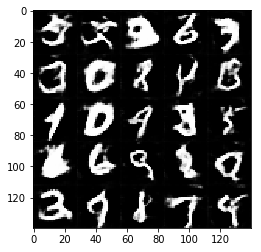

Epoch : 2/10 ... Step : 1110 ... d_loss : 1.0335756540298462 ... g_loss : 1.719269871711731
Epoch : 2/10 ... Step : 1120 ... d_loss : 0.9154480695724487 ... g_loss : 2.6639859676361084
Epoch : 2/10 ... Step : 1130 ... d_loss : 1.3489668369293213 ... g_loss : 2.732447624206543
Epoch : 2/10 ... Step : 1140 ... d_loss : 2.1358413696289062 ... g_loss : 0.8988897800445557
Epoch : 2/10 ... Step : 1150 ... d_loss : 0.8541155457496643 ... g_loss : 1.686530351638794
Epoch : 2/10 ... Step : 1160 ... d_loss : 0.598373532295227 ... g_loss : 2.203688859939575
Epoch : 2/10 ... Step : 1170 ... d_loss : 2.197537660598755 ... g_loss : 0.5535001158714294
Epoch : 2/10 ... Step : 1180 ... d_loss : 0.8037204742431641 ... g_loss : 2.0286293029785156
Epoch : 2/10 ... Step : 1190 ... d_loss : 1.2419915199279785 ... g_loss : 2.5132601261138916
Epoch : 2/10 ... Step : 1200 ... d_loss : 1.2888624668121338 ... g_loss : 0.7693620324134827


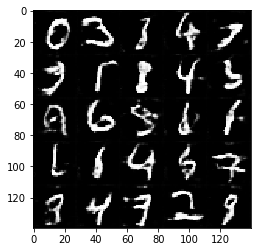

Epoch : 2/10 ... Step : 1210 ... d_loss : 0.6594811677932739 ... g_loss : 2.318613052368164
Epoch : 2/10 ... Step : 1220 ... d_loss : 0.7382668256759644 ... g_loss : 1.93937349319458
Epoch : 2/10 ... Step : 1230 ... d_loss : 1.137808084487915 ... g_loss : 2.6914658546447754
Epoch : 2/10 ... Step : 1240 ... d_loss : 0.9283720850944519 ... g_loss : 0.8737508058547974
Epoch : 2/10 ... Step : 1250 ... d_loss : 0.700541615486145 ... g_loss : 2.6104791164398193
Epoch : 2/10 ... Step : 1260 ... d_loss : 0.9245755076408386 ... g_loss : 1.7796504497528076
Epoch : 2/10 ... Step : 1270 ... d_loss : 1.0089993476867676 ... g_loss : 1.4574518203735352
Epoch : 2/10 ... Step : 1280 ... d_loss : 0.767358660697937 ... g_loss : 3.860180377960205
Epoch : 2/10 ... Step : 1290 ... d_loss : 0.687808632850647 ... g_loss : 3.1824092864990234
Epoch : 2/10 ... Step : 1300 ... d_loss : 1.2307770252227783 ... g_loss : 0.9679495096206665


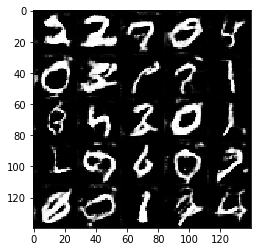

Epoch : 2/10 ... Step : 1310 ... d_loss : 0.8043131828308105 ... g_loss : 2.7005186080932617
Epoch : 2/10 ... Step : 1320 ... d_loss : 1.0527235269546509 ... g_loss : 2.296700954437256
Epoch : 2/10 ... Step : 1330 ... d_loss : 0.9242451190948486 ... g_loss : 2.6920900344848633
Epoch : 2/10 ... Step : 1340 ... d_loss : 1.0833114385604858 ... g_loss : 0.9891119599342346
Epoch : 2/10 ... Step : 1350 ... d_loss : 0.9777916073799133 ... g_loss : 1.3261208534240723
Epoch : 2/10 ... Step : 1360 ... d_loss : 1.1125293970108032 ... g_loss : 2.6040217876434326
Epoch : 2/10 ... Step : 1370 ... d_loss : 1.1208983659744263 ... g_loss : 3.2875571250915527
Epoch : 2/10 ... Step : 1380 ... d_loss : 1.1692968606948853 ... g_loss : 3.6908512115478516
Epoch : 2/10 ... Step : 1390 ... d_loss : 0.659040629863739 ... g_loss : 3.4019718170166016
Epoch : 2/10 ... Step : 1400 ... d_loss : 1.029549479484558 ... g_loss : 3.553986072540283


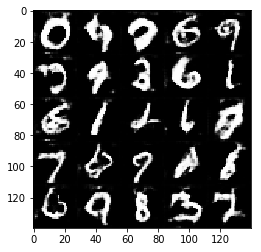

Epoch : 2/10 ... Step : 1410 ... d_loss : 0.6275672316551208 ... g_loss : 1.2423840761184692
Epoch : 2/10 ... Step : 1420 ... d_loss : 1.2588410377502441 ... g_loss : 2.155533790588379
Epoch : 2/10 ... Step : 1430 ... d_loss : 0.7913228273391724 ... g_loss : 1.539710283279419
Epoch : 2/10 ... Step : 1440 ... d_loss : 1.0762951374053955 ... g_loss : 1.6703287363052368
Epoch : 2/10 ... Step : 1450 ... d_loss : 0.9002818465232849 ... g_loss : 2.6891283988952637
Epoch : 2/10 ... Step : 1460 ... d_loss : 0.9602522850036621 ... g_loss : 3.3632049560546875
Epoch : 2/10 ... Step : 1470 ... d_loss : 1.2924264669418335 ... g_loss : 0.6108856797218323
Epoch : 2/10 ... Step : 1480 ... d_loss : 0.878288209438324 ... g_loss : 2.185183525085449
Epoch : 2/10 ... Step : 1490 ... d_loss : 0.8553974628448486 ... g_loss : 1.1649360656738281
Epoch : 2/10 ... Step : 1500 ... d_loss : 0.3988640010356903 ... g_loss : 2.1921768188476562


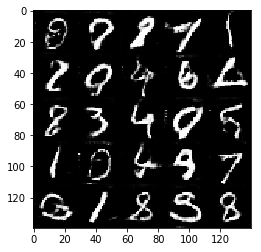

Epoch : 2/10 ... Step : 1510 ... d_loss : 0.8318716287612915 ... g_loss : 1.8306682109832764
Epoch : 2/10 ... Step : 1520 ... d_loss : 0.8171424269676208 ... g_loss : 1.9990744590759277
Epoch : 2/10 ... Step : 1530 ... d_loss : 0.7321562767028809 ... g_loss : 2.57387113571167
Epoch : 2/10 ... Step : 1540 ... d_loss : 0.8186473250389099 ... g_loss : 2.6917452812194824
Epoch : 2/10 ... Step : 1550 ... d_loss : 0.6549835205078125 ... g_loss : 3.4486093521118164
Epoch : 2/10 ... Step : 1560 ... d_loss : 0.8387849926948547 ... g_loss : 2.2575533390045166
Epoch : 2/10 ... Step : 1570 ... d_loss : 0.9419991970062256 ... g_loss : 1.3161532878875732
Epoch : 2/10 ... Step : 1580 ... d_loss : 0.6513596773147583 ... g_loss : 2.465937614440918
Epoch : 2/10 ... Step : 1590 ... d_loss : 0.47604960203170776 ... g_loss : 2.618772506713867
Epoch : 2/10 ... Step : 1600 ... d_loss : 0.782699704170227 ... g_loss : 3.274993419647217


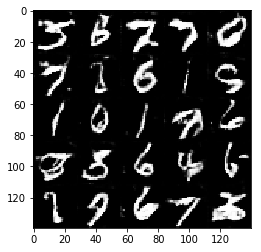

Epoch : 2/10 ... Step : 1610 ... d_loss : 1.4192713499069214 ... g_loss : 1.2682976722717285
Epoch : 2/10 ... Step : 1620 ... d_loss : 1.5453224182128906 ... g_loss : 4.8079423904418945
Epoch : 2/10 ... Step : 1630 ... d_loss : 0.7146707773208618 ... g_loss : 2.338101387023926
Epoch : 2/10 ... Step : 1640 ... d_loss : 0.591732382774353 ... g_loss : 1.9977675676345825
Epoch : 2/10 ... Step : 1650 ... d_loss : 0.8881114721298218 ... g_loss : 2.847430944442749
Epoch : 2/10 ... Step : 1660 ... d_loss : 1.460009217262268 ... g_loss : 4.008159637451172
Epoch : 2/10 ... Step : 1670 ... d_loss : 0.2968323826789856 ... g_loss : 2.938028573989868
Epoch : 2/10 ... Step : 1680 ... d_loss : 0.9376636147499084 ... g_loss : 1.5440454483032227
Epoch : 2/10 ... Step : 1690 ... d_loss : 1.5224289894104004 ... g_loss : 1.3404133319854736
Epoch : 2/10 ... Step : 1700 ... d_loss : 0.7500982880592346 ... g_loss : 2.530766487121582


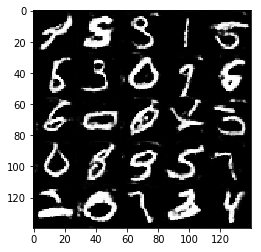

Epoch : 2/10 ... Step : 1710 ... d_loss : 0.8649455308914185 ... g_loss : 2.5496389865875244
Epoch : 2/10 ... Step : 1720 ... d_loss : 0.7861897349357605 ... g_loss : 1.3423779010772705
Epoch : 2/10 ... Step : 1730 ... d_loss : 0.5870214104652405 ... g_loss : 2.47225284576416
Epoch : 2/10 ... Step : 1740 ... d_loss : 0.8374783992767334 ... g_loss : 1.2392834424972534
Epoch : 2/10 ... Step : 1750 ... d_loss : 0.7100834250450134 ... g_loss : 4.410523891448975
Epoch : 2/10 ... Step : 1760 ... d_loss : 0.5476638078689575 ... g_loss : 3.621229887008667
Epoch : 2/10 ... Step : 1770 ... d_loss : 1.1542410850524902 ... g_loss : 3.4449658393859863
Epoch : 2/10 ... Step : 1780 ... d_loss : 1.1973800659179688 ... g_loss : 0.6177740693092346
Epoch : 2/10 ... Step : 1790 ... d_loss : 0.7304009199142456 ... g_loss : 1.9425467252731323
Epoch : 2/10 ... Step : 1800 ... d_loss : 0.6027825474739075 ... g_loss : 2.5887718200683594


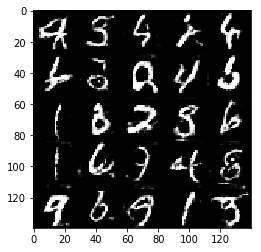

Epoch : 2/10 ... Step : 1810 ... d_loss : 0.5702548027038574 ... g_loss : 2.218031167984009
Epoch : 2/10 ... Step : 1820 ... d_loss : 1.037251591682434 ... g_loss : 1.4851902723312378
Epoch : 2/10 ... Step : 1830 ... d_loss : 0.7664676904678345 ... g_loss : 2.5061397552490234
Epoch : 2/10 ... Step : 1840 ... d_loss : 1.831907868385315 ... g_loss : 3.5493087768554688
Epoch : 2/10 ... Step : 1850 ... d_loss : 1.070662260055542 ... g_loss : 1.228297472000122
Epoch : 2/10 ... Step : 1860 ... d_loss : 0.6384458541870117 ... g_loss : 3.139857292175293
Epoch : 2/10 ... Step : 1870 ... d_loss : 0.8266814351081848 ... g_loss : 2.1404781341552734
Epoch : 3/10 ... Step : 1880 ... d_loss : 0.6876800060272217 ... g_loss : 1.6896257400512695
Epoch : 3/10 ... Step : 1890 ... d_loss : 0.6212671995162964 ... g_loss : 2.795193672180176
Epoch : 3/10 ... Step : 1900 ... d_loss : 0.6258349418640137 ... g_loss : 2.9514169692993164


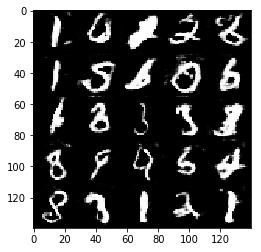

Epoch : 3/10 ... Step : 1910 ... d_loss : 0.5197024345397949 ... g_loss : 3.576925754547119
Epoch : 3/10 ... Step : 1920 ... d_loss : 0.6789804100990295 ... g_loss : 2.4114770889282227
Epoch : 3/10 ... Step : 1930 ... d_loss : 0.7812007665634155 ... g_loss : 2.6419472694396973
Epoch : 3/10 ... Step : 1940 ... d_loss : 0.559668779373169 ... g_loss : 2.9405384063720703
Epoch : 3/10 ... Step : 1950 ... d_loss : 1.3878861665725708 ... g_loss : 2.41098690032959
Epoch : 3/10 ... Step : 1960 ... d_loss : 1.0843268632888794 ... g_loss : 1.6005196571350098
Epoch : 3/10 ... Step : 1970 ... d_loss : 0.9706768989562988 ... g_loss : 1.6747853755950928
Epoch : 3/10 ... Step : 1980 ... d_loss : 0.8149895071983337 ... g_loss : 2.430111885070801
Epoch : 3/10 ... Step : 1990 ... d_loss : 0.6292214393615723 ... g_loss : 2.4433095455169678
Epoch : 3/10 ... Step : 2000 ... d_loss : 0.9085840582847595 ... g_loss : 2.717501640319824


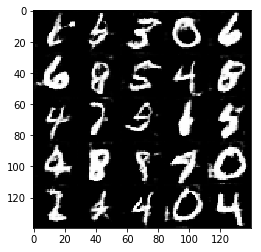

Epoch : 3/10 ... Step : 2010 ... d_loss : 1.7359578609466553 ... g_loss : 0.39884862303733826
Epoch : 3/10 ... Step : 2020 ... d_loss : 0.7601515054702759 ... g_loss : 1.9833523035049438
Epoch : 3/10 ... Step : 2030 ... d_loss : 0.7207311391830444 ... g_loss : 3.14587140083313
Epoch : 3/10 ... Step : 2040 ... d_loss : 0.9974242448806763 ... g_loss : 1.9572521448135376
Epoch : 3/10 ... Step : 2050 ... d_loss : 0.6693199276924133 ... g_loss : 2.7504584789276123
Epoch : 3/10 ... Step : 2060 ... d_loss : 0.774808406829834 ... g_loss : 1.2190520763397217
Epoch : 3/10 ... Step : 2070 ... d_loss : 0.6059982180595398 ... g_loss : 2.321535110473633
Epoch : 3/10 ... Step : 2080 ... d_loss : 1.9889495372772217 ... g_loss : 2.463627815246582
Epoch : 3/10 ... Step : 2090 ... d_loss : 0.9435879588127136 ... g_loss : 1.9023306369781494
Epoch : 3/10 ... Step : 2100 ... d_loss : 1.3695597648620605 ... g_loss : 1.5434205532073975


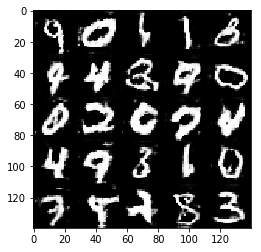

Epoch : 3/10 ... Step : 2110 ... d_loss : 0.6556255221366882 ... g_loss : 2.2429826259613037
Epoch : 3/10 ... Step : 2120 ... d_loss : 0.9030722975730896 ... g_loss : 1.0781893730163574
Epoch : 3/10 ... Step : 2130 ... d_loss : 0.6952121257781982 ... g_loss : 1.6060776710510254
Epoch : 3/10 ... Step : 2140 ... d_loss : 1.5196149349212646 ... g_loss : 4.305919647216797
Epoch : 3/10 ... Step : 2150 ... d_loss : 0.5989052653312683 ... g_loss : 3.096273899078369
Epoch : 3/10 ... Step : 2160 ... d_loss : 0.8770992755889893 ... g_loss : 3.782188653945923
Epoch : 3/10 ... Step : 2170 ... d_loss : 0.36531487107276917 ... g_loss : 2.2926363945007324
Epoch : 3/10 ... Step : 2180 ... d_loss : 1.0434901714324951 ... g_loss : 1.2778937816619873
Epoch : 3/10 ... Step : 2190 ... d_loss : 0.879559338092804 ... g_loss : 1.0717111825942993
Epoch : 3/10 ... Step : 2200 ... d_loss : 0.6103466749191284 ... g_loss : 2.1747941970825195


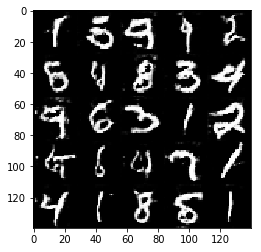

Epoch : 3/10 ... Step : 2210 ... d_loss : 2.3046820163726807 ... g_loss : 0.6199878454208374
Epoch : 3/10 ... Step : 2220 ... d_loss : 0.686621367931366 ... g_loss : 3.0048248767852783
Epoch : 3/10 ... Step : 2230 ... d_loss : 0.9679076075553894 ... g_loss : 3.4784746170043945
Epoch : 3/10 ... Step : 2240 ... d_loss : 0.6213066577911377 ... g_loss : 2.5133588314056396
Epoch : 3/10 ... Step : 2250 ... d_loss : 1.1582366228103638 ... g_loss : 3.9821929931640625
Epoch : 3/10 ... Step : 2260 ... d_loss : 0.5526448488235474 ... g_loss : 2.8499743938446045
Epoch : 3/10 ... Step : 2270 ... d_loss : 1.188005805015564 ... g_loss : 2.000993251800537
Epoch : 3/10 ... Step : 2280 ... d_loss : 0.798149585723877 ... g_loss : 1.4764539003372192
Epoch : 3/10 ... Step : 2290 ... d_loss : 1.1022878885269165 ... g_loss : 4.312058448791504
Epoch : 3/10 ... Step : 2300 ... d_loss : 0.6734094619750977 ... g_loss : 3.18026065826416


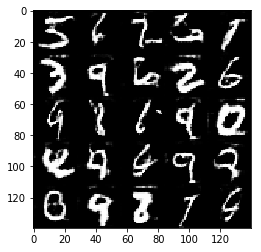

Epoch : 3/10 ... Step : 2310 ... d_loss : 0.3153733015060425 ... g_loss : 2.9962711334228516
Epoch : 3/10 ... Step : 2320 ... d_loss : 0.6245518326759338 ... g_loss : 1.6377334594726562
Epoch : 3/10 ... Step : 2330 ... d_loss : 0.7013351321220398 ... g_loss : 2.2432076930999756
Epoch : 3/10 ... Step : 2340 ... d_loss : 0.6023874878883362 ... g_loss : 4.073761940002441
Epoch : 3/10 ... Step : 2350 ... d_loss : 0.8917260766029358 ... g_loss : 2.1076507568359375
Epoch : 3/10 ... Step : 2360 ... d_loss : 0.8381975889205933 ... g_loss : 5.4127678871154785
Epoch : 3/10 ... Step : 2370 ... d_loss : 1.00754976272583 ... g_loss : 2.9876561164855957
Epoch : 3/10 ... Step : 2380 ... d_loss : 0.8881943225860596 ... g_loss : 2.7378804683685303
Epoch : 3/10 ... Step : 2390 ... d_loss : 0.5369030237197876 ... g_loss : 3.002049684524536
Epoch : 3/10 ... Step : 2400 ... d_loss : 0.79323410987854 ... g_loss : 1.5068964958190918


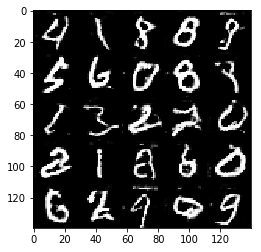

Epoch : 3/10 ... Step : 2410 ... d_loss : 0.6769485473632812 ... g_loss : 1.923241376876831
Epoch : 3/10 ... Step : 2420 ... d_loss : 0.8488559722900391 ... g_loss : 3.638395071029663
Epoch : 3/10 ... Step : 2430 ... d_loss : 0.358085960149765 ... g_loss : 2.333353042602539
Epoch : 3/10 ... Step : 2440 ... d_loss : 0.4908442497253418 ... g_loss : 2.1531639099121094
Epoch : 3/10 ... Step : 2450 ... d_loss : 0.9898642897605896 ... g_loss : 3.6340107917785645
Epoch : 3/10 ... Step : 2460 ... d_loss : 0.6031939387321472 ... g_loss : 1.9693613052368164
Epoch : 3/10 ... Step : 2470 ... d_loss : 0.46483170986175537 ... g_loss : 3.302992582321167
Epoch : 3/10 ... Step : 2480 ... d_loss : 0.31832700967788696 ... g_loss : 3.3781938552856445
Epoch : 3/10 ... Step : 2490 ... d_loss : 0.2872273623943329 ... g_loss : 3.1563472747802734
Epoch : 3/10 ... Step : 2500 ... d_loss : 1.1135830879211426 ... g_loss : 4.903600692749023


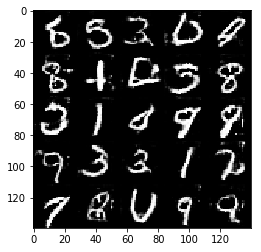

Epoch : 3/10 ... Step : 2510 ... d_loss : 0.8707605600357056 ... g_loss : 1.0167261362075806
Epoch : 3/10 ... Step : 2520 ... d_loss : 0.40271222591400146 ... g_loss : 2.328646659851074
Epoch : 3/10 ... Step : 2530 ... d_loss : 1.1393910646438599 ... g_loss : 5.431860446929932
Epoch : 3/10 ... Step : 2540 ... d_loss : 0.8106052279472351 ... g_loss : 1.556598424911499
Epoch : 3/10 ... Step : 2550 ... d_loss : 0.3620927333831787 ... g_loss : 3.2217016220092773
Epoch : 3/10 ... Step : 2560 ... d_loss : 1.5505598783493042 ... g_loss : 0.66895592212677
Epoch : 3/10 ... Step : 2570 ... d_loss : 0.556361198425293 ... g_loss : 3.652507781982422
Epoch : 3/10 ... Step : 2580 ... d_loss : 0.29966843128204346 ... g_loss : 3.71964955329895
Epoch : 3/10 ... Step : 2590 ... d_loss : 0.7287103533744812 ... g_loss : 0.6968677043914795
Epoch : 3/10 ... Step : 2600 ... d_loss : 1.117975115776062 ... g_loss : 2.6140875816345215


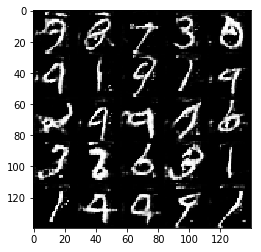

Epoch : 3/10 ... Step : 2610 ... d_loss : 0.3603280782699585 ... g_loss : 3.121763229370117
Epoch : 3/10 ... Step : 2620 ... d_loss : 1.600315809249878 ... g_loss : 2.963735818862915
Epoch : 3/10 ... Step : 2630 ... d_loss : 0.6509348154067993 ... g_loss : 3.90339994430542
Epoch : 3/10 ... Step : 2640 ... d_loss : 0.7800222039222717 ... g_loss : 1.5005600452423096
Epoch : 3/10 ... Step : 2650 ... d_loss : 0.374279260635376 ... g_loss : 3.020594358444214
Epoch : 3/10 ... Step : 2660 ... d_loss : 0.24396337568759918 ... g_loss : 3.294424533843994
Epoch : 3/10 ... Step : 2670 ... d_loss : 0.3944002687931061 ... g_loss : 3.977750301361084
Epoch : 3/10 ... Step : 2680 ... d_loss : 1.8824516534805298 ... g_loss : 1.6367048025131226
Epoch : 3/10 ... Step : 2690 ... d_loss : 1.1978286504745483 ... g_loss : 1.0190393924713135
Epoch : 3/10 ... Step : 2700 ... d_loss : 1.0392440557479858 ... g_loss : 1.450859785079956


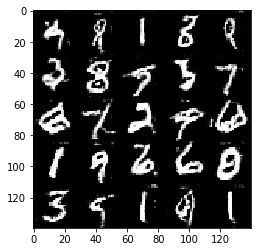

Epoch : 3/10 ... Step : 2710 ... d_loss : 0.5825746059417725 ... g_loss : 2.6642203330993652
Epoch : 3/10 ... Step : 2720 ... d_loss : 0.46029916405677795 ... g_loss : 3.378830909729004
Epoch : 3/10 ... Step : 2730 ... d_loss : 0.9298189878463745 ... g_loss : 4.683013439178467
Epoch : 3/10 ... Step : 2740 ... d_loss : 0.672548770904541 ... g_loss : 2.3659117221832275
Epoch : 3/10 ... Step : 2750 ... d_loss : 1.2758187055587769 ... g_loss : 0.3350875973701477
Epoch : 3/10 ... Step : 2760 ... d_loss : 0.8044378757476807 ... g_loss : 1.8762757778167725
Epoch : 3/10 ... Step : 2770 ... d_loss : 0.8277552723884583 ... g_loss : 2.5451672077178955
Epoch : 3/10 ... Step : 2780 ... d_loss : 0.4586849808692932 ... g_loss : 2.7506027221679688
Epoch : 3/10 ... Step : 2790 ... d_loss : 0.41380882263183594 ... g_loss : 3.410491704940796
Epoch : 3/10 ... Step : 2800 ... d_loss : 0.6617178916931152 ... g_loss : 2.8000431060791016


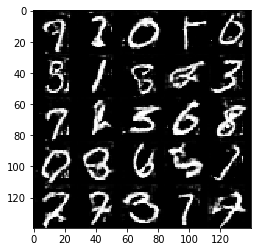

Epoch : 3/10 ... Step : 2810 ... d_loss : 1.3852107524871826 ... g_loss : 2.2600693702697754
Epoch : 4/10 ... Step : 2820 ... d_loss : 0.45702803134918213 ... g_loss : 2.2762198448181152
Epoch : 4/10 ... Step : 2830 ... d_loss : 0.6500443816184998 ... g_loss : 3.176935911178589
Epoch : 4/10 ... Step : 2840 ... d_loss : 0.5311230421066284 ... g_loss : 2.1560308933258057
Epoch : 4/10 ... Step : 2850 ... d_loss : 1.0627245903015137 ... g_loss : 1.6787950992584229
Epoch : 4/10 ... Step : 2860 ... d_loss : 0.7563425898551941 ... g_loss : 5.428862571716309
Epoch : 4/10 ... Step : 2870 ... d_loss : 0.388843834400177 ... g_loss : 3.382420778274536
Epoch : 4/10 ... Step : 2880 ... d_loss : 0.12524618208408356 ... g_loss : 4.579204082489014
Epoch : 4/10 ... Step : 2890 ... d_loss : 2.167823314666748 ... g_loss : 5.2863616943359375
Epoch : 4/10 ... Step : 2900 ... d_loss : 1.2969845533370972 ... g_loss : 0.8685736656188965


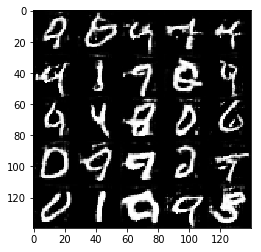

Epoch : 4/10 ... Step : 2910 ... d_loss : 0.687046468257904 ... g_loss : 1.8076841831207275
Epoch : 4/10 ... Step : 2920 ... d_loss : 0.6872557401657104 ... g_loss : 1.9326372146606445
Epoch : 4/10 ... Step : 2930 ... d_loss : 0.5128529071807861 ... g_loss : 5.673361778259277
Epoch : 4/10 ... Step : 2940 ... d_loss : 0.6029564142227173 ... g_loss : 2.9857351779937744
Epoch : 4/10 ... Step : 2950 ... d_loss : 0.9304505586624146 ... g_loss : 2.9312610626220703
Epoch : 4/10 ... Step : 2960 ... d_loss : 1.1422818899154663 ... g_loss : 3.015167236328125
Epoch : 4/10 ... Step : 2970 ... d_loss : 0.33338463306427 ... g_loss : 2.993155002593994
Epoch : 4/10 ... Step : 2980 ... d_loss : 0.667069673538208 ... g_loss : 2.1975338459014893
Epoch : 4/10 ... Step : 2990 ... d_loss : 0.395591676235199 ... g_loss : 3.7292847633361816
Epoch : 4/10 ... Step : 3000 ... d_loss : 0.29806387424468994 ... g_loss : 2.7630906105041504


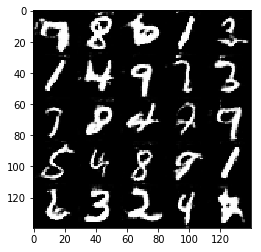

Epoch : 4/10 ... Step : 3010 ... d_loss : 0.3685765862464905 ... g_loss : 2.047623634338379
Epoch : 4/10 ... Step : 3020 ... d_loss : 0.5661174654960632 ... g_loss : 4.464141845703125
Epoch : 4/10 ... Step : 3030 ... d_loss : 0.7662981152534485 ... g_loss : 2.4819178581237793
Epoch : 4/10 ... Step : 3040 ... d_loss : 0.3648286759853363 ... g_loss : 2.7499399185180664
Epoch : 4/10 ... Step : 3050 ... d_loss : 0.18059372901916504 ... g_loss : 4.026214122772217
Epoch : 4/10 ... Step : 3060 ... d_loss : 0.323852002620697 ... g_loss : 2.0818588733673096
Epoch : 4/10 ... Step : 3070 ... d_loss : 0.2890133261680603 ... g_loss : 3.380502223968506
Epoch : 4/10 ... Step : 3080 ... d_loss : 0.6702040433883667 ... g_loss : 1.7713932991027832
Epoch : 4/10 ... Step : 3090 ... d_loss : 1.7228559255599976 ... g_loss : 1.4509375095367432
Epoch : 4/10 ... Step : 3100 ... d_loss : 0.7480499744415283 ... g_loss : 3.919896125793457


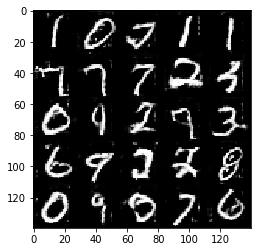

Epoch : 4/10 ... Step : 3110 ... d_loss : 0.303931325674057 ... g_loss : 3.6131787300109863
Epoch : 4/10 ... Step : 3120 ... d_loss : 0.1991620808839798 ... g_loss : 3.510369062423706
Epoch : 4/10 ... Step : 3130 ... d_loss : 0.22725118696689606 ... g_loss : 3.131316661834717
Epoch : 4/10 ... Step : 3140 ... d_loss : 0.2848154902458191 ... g_loss : 2.7988219261169434
Epoch : 4/10 ... Step : 3150 ... d_loss : 0.1549346148967743 ... g_loss : 4.549923896789551
Epoch : 4/10 ... Step : 3160 ... d_loss : 0.3157719075679779 ... g_loss : 3.732738494873047
Epoch : 4/10 ... Step : 3170 ... d_loss : 0.2435213029384613 ... g_loss : 4.425310134887695
Epoch : 4/10 ... Step : 3180 ... d_loss : 0.18149979412555695 ... g_loss : 3.263108730316162
Epoch : 4/10 ... Step : 3190 ... d_loss : 0.3247827887535095 ... g_loss : 3.3761396408081055
Epoch : 4/10 ... Step : 3200 ... d_loss : 0.15854185819625854 ... g_loss : 3.8315858840942383


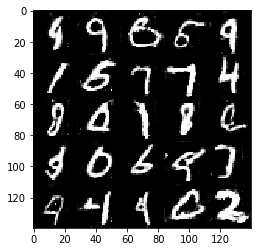

Epoch : 4/10 ... Step : 3210 ... d_loss : 0.18810072541236877 ... g_loss : 3.645890235900879
Epoch : 4/10 ... Step : 3220 ... d_loss : 0.3073476254940033 ... g_loss : 4.7177228927612305
Epoch : 4/10 ... Step : 3230 ... d_loss : 0.9789868593215942 ... g_loss : 4.540009498596191
Epoch : 4/10 ... Step : 3240 ... d_loss : 0.7767301201820374 ... g_loss : 3.1381471157073975
Epoch : 4/10 ... Step : 3250 ... d_loss : 2.361053705215454 ... g_loss : 2.22110652923584
Epoch : 4/10 ... Step : 3260 ... d_loss : 0.7166042327880859 ... g_loss : 3.7539820671081543
Epoch : 4/10 ... Step : 3270 ... d_loss : 1.375674843788147 ... g_loss : 5.640787124633789
Epoch : 4/10 ... Step : 3280 ... d_loss : 0.36544978618621826 ... g_loss : 3.003166675567627
Epoch : 4/10 ... Step : 3290 ... d_loss : 0.3757520020008087 ... g_loss : 3.5299839973449707
Epoch : 4/10 ... Step : 3300 ... d_loss : 0.4508762061595917 ... g_loss : 2.182831048965454


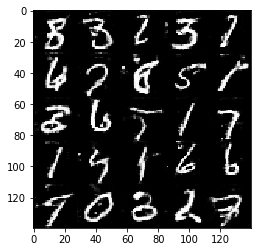

Epoch : 4/10 ... Step : 3310 ... d_loss : 0.6498488783836365 ... g_loss : 3.083042621612549
Epoch : 4/10 ... Step : 3320 ... d_loss : 0.5324718952178955 ... g_loss : 1.6175322532653809
Epoch : 4/10 ... Step : 3330 ... d_loss : 0.5264775156974792 ... g_loss : 3.6978354454040527
Epoch : 4/10 ... Step : 3340 ... d_loss : 0.6177459359169006 ... g_loss : 3.8493094444274902
Epoch : 4/10 ... Step : 3350 ... d_loss : 0.20867586135864258 ... g_loss : 4.148177623748779
Epoch : 4/10 ... Step : 3360 ... d_loss : 0.2767804265022278 ... g_loss : 4.776662826538086
Epoch : 4/10 ... Step : 3370 ... d_loss : 0.5793380737304688 ... g_loss : 1.5093721151351929
Epoch : 4/10 ... Step : 3380 ... d_loss : 0.5587499737739563 ... g_loss : 3.6375603675842285
Epoch : 4/10 ... Step : 3390 ... d_loss : 0.48746174573898315 ... g_loss : 3.7844293117523193
Epoch : 4/10 ... Step : 3400 ... d_loss : 0.11110837012529373 ... g_loss : 4.008070945739746


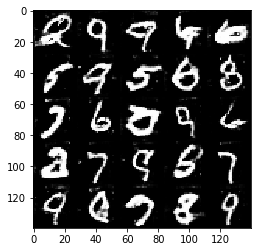

Epoch : 4/10 ... Step : 3410 ... d_loss : 0.11344379186630249 ... g_loss : 3.6011390686035156
Epoch : 4/10 ... Step : 3420 ... d_loss : 0.15925711393356323 ... g_loss : 3.7038583755493164
Epoch : 4/10 ... Step : 3430 ... d_loss : 0.4873153567314148 ... g_loss : 2.8229355812072754
Epoch : 4/10 ... Step : 3440 ... d_loss : 0.8319832682609558 ... g_loss : 1.2833715677261353
Epoch : 4/10 ... Step : 3450 ... d_loss : 0.9539816379547119 ... g_loss : 0.9888925552368164
Epoch : 4/10 ... Step : 3460 ... d_loss : 0.7331333756446838 ... g_loss : 1.6842947006225586
Epoch : 4/10 ... Step : 3470 ... d_loss : 0.4065011739730835 ... g_loss : 3.690208911895752
Epoch : 4/10 ... Step : 3480 ... d_loss : 0.4153558909893036 ... g_loss : 4.496819019317627
Epoch : 4/10 ... Step : 3490 ... d_loss : 1.5476081371307373 ... g_loss : 9.470739364624023
Epoch : 4/10 ... Step : 3500 ... d_loss : 0.6158453226089478 ... g_loss : 3.0617685317993164


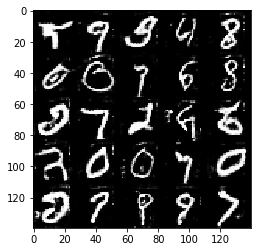

Epoch : 4/10 ... Step : 3510 ... d_loss : 0.7848144769668579 ... g_loss : 2.565505027770996
Epoch : 4/10 ... Step : 3520 ... d_loss : 0.3313739597797394 ... g_loss : 3.5445446968078613
Epoch : 4/10 ... Step : 3530 ... d_loss : 0.6133471131324768 ... g_loss : 2.4567627906799316
Epoch : 4/10 ... Step : 3540 ... d_loss : 0.603750467300415 ... g_loss : 2.6196541786193848
Epoch : 4/10 ... Step : 3550 ... d_loss : 0.6095855832099915 ... g_loss : 2.249553918838501
Epoch : 4/10 ... Step : 3560 ... d_loss : 0.297860324382782 ... g_loss : 4.130716323852539
Epoch : 4/10 ... Step : 3570 ... d_loss : 0.2864093780517578 ... g_loss : 2.9085140228271484
Epoch : 4/10 ... Step : 3580 ... d_loss : 1.126969337463379 ... g_loss : 5.724924087524414
Epoch : 4/10 ... Step : 3590 ... d_loss : 0.2864258289337158 ... g_loss : 2.5035674571990967
Epoch : 4/10 ... Step : 3600 ... d_loss : 0.6529532670974731 ... g_loss : 2.859992027282715


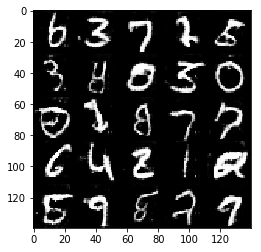

Epoch : 4/10 ... Step : 3610 ... d_loss : 0.9330975413322449 ... g_loss : 1.4175052642822266
Epoch : 4/10 ... Step : 3620 ... d_loss : 0.25010350346565247 ... g_loss : 3.7199511528015137
Epoch : 4/10 ... Step : 3630 ... d_loss : 0.0972704365849495 ... g_loss : 4.251500606536865
Epoch : 4/10 ... Step : 3640 ... d_loss : 0.14907586574554443 ... g_loss : 4.038156509399414
Epoch : 4/10 ... Step : 3650 ... d_loss : 0.24602647125720978 ... g_loss : 3.654001474380493
Epoch : 4/10 ... Step : 3660 ... d_loss : 0.22192548215389252 ... g_loss : 4.000104904174805
Epoch : 4/10 ... Step : 3670 ... d_loss : 0.3003673553466797 ... g_loss : 4.187995910644531
Epoch : 4/10 ... Step : 3680 ... d_loss : 0.30468297004699707 ... g_loss : 3.5094783306121826
Epoch : 4/10 ... Step : 3690 ... d_loss : 0.17073962092399597 ... g_loss : 4.923833847045898
Epoch : 4/10 ... Step : 3700 ... d_loss : 0.12310756742954254 ... g_loss : 4.2938737869262695


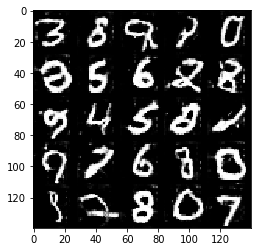

Epoch : 4/10 ... Step : 3710 ... d_loss : 0.08356243371963501 ... g_loss : 5.685659408569336
Epoch : 4/10 ... Step : 3720 ... d_loss : 0.06300653517246246 ... g_loss : 4.632534980773926
Epoch : 4/10 ... Step : 3730 ... d_loss : 0.1295255422592163 ... g_loss : 4.906928062438965
Epoch : 4/10 ... Step : 3740 ... d_loss : 2.575941324234009 ... g_loss : 5.13797664642334
Epoch : 5/10 ... Step : 3750 ... d_loss : 1.1848102807998657 ... g_loss : 4.170968055725098
Epoch : 5/10 ... Step : 3760 ... d_loss : 0.5407878160476685 ... g_loss : 1.52827787399292
Epoch : 5/10 ... Step : 3770 ... d_loss : 0.8294597268104553 ... g_loss : 3.2291295528411865
Epoch : 5/10 ... Step : 3780 ... d_loss : 1.4497365951538086 ... g_loss : 1.2825380563735962
Epoch : 5/10 ... Step : 3790 ... d_loss : 0.8172213435173035 ... g_loss : 3.130376100540161
Epoch : 5/10 ... Step : 3800 ... d_loss : 0.28973388671875 ... g_loss : 3.098207950592041


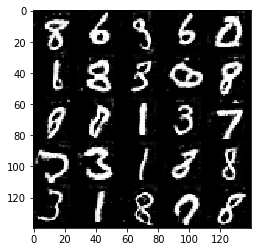

Epoch : 5/10 ... Step : 3810 ... d_loss : 0.30199676752090454 ... g_loss : 3.961540699005127
Epoch : 5/10 ... Step : 3820 ... d_loss : 0.4007960855960846 ... g_loss : 4.720726013183594
Epoch : 5/10 ... Step : 3830 ... d_loss : 0.2338714897632599 ... g_loss : 4.461013317108154
Epoch : 5/10 ... Step : 3840 ... d_loss : 0.1842723786830902 ... g_loss : 3.769836902618408
Epoch : 5/10 ... Step : 3850 ... d_loss : 0.2158692330121994 ... g_loss : 3.9970006942749023
Epoch : 5/10 ... Step : 3860 ... d_loss : 0.2237279713153839 ... g_loss : 2.797482967376709
Epoch : 5/10 ... Step : 3870 ... d_loss : 0.5657139420509338 ... g_loss : 2.9233148097991943
Epoch : 5/10 ... Step : 3880 ... d_loss : 0.2623926103115082 ... g_loss : 3.046438694000244
Epoch : 5/10 ... Step : 3890 ... d_loss : 0.7554762363433838 ... g_loss : 1.768021583557129
Epoch : 5/10 ... Step : 3900 ... d_loss : 0.7378473877906799 ... g_loss : 2.2340898513793945


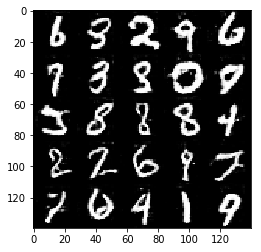

Epoch : 5/10 ... Step : 3910 ... d_loss : 0.6278896331787109 ... g_loss : 3.8769845962524414
Epoch : 5/10 ... Step : 3920 ... d_loss : 0.7005281448364258 ... g_loss : 1.427491307258606
Epoch : 5/10 ... Step : 3930 ... d_loss : 0.45041126012802124 ... g_loss : 2.359966278076172
Epoch : 5/10 ... Step : 3940 ... d_loss : 1.2242149114608765 ... g_loss : 1.6982060670852661
Epoch : 5/10 ... Step : 3950 ... d_loss : 0.45797258615493774 ... g_loss : 2.7823126316070557
Epoch : 5/10 ... Step : 3960 ... d_loss : 0.649852454662323 ... g_loss : 2.1703662872314453
Epoch : 5/10 ... Step : 3970 ... d_loss : 0.22654178738594055 ... g_loss : 3.5228469371795654
Epoch : 5/10 ... Step : 3980 ... d_loss : 0.11625228822231293 ... g_loss : 3.5240306854248047
Epoch : 5/10 ... Step : 3990 ... d_loss : 0.14857754111289978 ... g_loss : 4.549731254577637
Epoch : 5/10 ... Step : 4000 ... d_loss : 0.4691773056983948 ... g_loss : 4.446135520935059


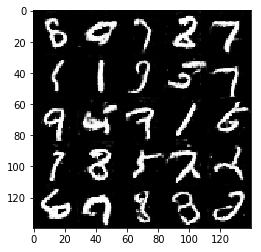

Epoch : 5/10 ... Step : 4010 ... d_loss : 0.4751555323600769 ... g_loss : 3.19518780708313
Epoch : 5/10 ... Step : 4020 ... d_loss : 0.12418337911367416 ... g_loss : 4.4914045333862305
Epoch : 5/10 ... Step : 4030 ... d_loss : 0.23061558604240417 ... g_loss : 3.3177013397216797
Epoch : 5/10 ... Step : 4040 ... d_loss : 0.27767473459243774 ... g_loss : 4.846829891204834
Epoch : 5/10 ... Step : 4050 ... d_loss : 0.05975072458386421 ... g_loss : 4.194761753082275
Epoch : 5/10 ... Step : 4060 ... d_loss : 0.11241286993026733 ... g_loss : 4.611127853393555
Epoch : 5/10 ... Step : 4070 ... d_loss : 0.09381356835365295 ... g_loss : 3.784818172454834
Epoch : 5/10 ... Step : 4080 ... d_loss : 0.04444434493780136 ... g_loss : 4.998353481292725
Epoch : 5/10 ... Step : 4090 ... d_loss : 0.09211961925029755 ... g_loss : 5.126161575317383
Epoch : 5/10 ... Step : 4100 ... d_loss : 0.26266777515411377 ... g_loss : 4.409296035766602


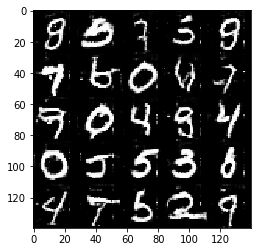

Epoch : 5/10 ... Step : 4110 ... d_loss : 0.06199003756046295 ... g_loss : 4.327274322509766
Epoch : 5/10 ... Step : 4120 ... d_loss : 0.18574482202529907 ... g_loss : 4.032162666320801
Epoch : 5/10 ... Step : 4130 ... d_loss : 2.7659823894500732 ... g_loss : 1.8919880390167236
Epoch : 5/10 ... Step : 4140 ... d_loss : 0.45955657958984375 ... g_loss : 3.283599376678467
Epoch : 5/10 ... Step : 4150 ... d_loss : 0.21579252183437347 ... g_loss : 5.211306571960449
Epoch : 5/10 ... Step : 4160 ... d_loss : 0.17635683715343475 ... g_loss : 4.601237773895264
Epoch : 5/10 ... Step : 4170 ... d_loss : 0.3069441020488739 ... g_loss : 4.269556045532227
Epoch : 5/10 ... Step : 4180 ... d_loss : 1.7468127012252808 ... g_loss : 2.2572314739227295
Epoch : 5/10 ... Step : 4190 ... d_loss : 0.8008681535720825 ... g_loss : 1.268168330192566
Epoch : 5/10 ... Step : 4200 ... d_loss : 0.638542115688324 ... g_loss : 3.481302261352539


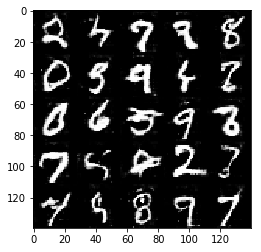

Epoch : 5/10 ... Step : 4210 ... d_loss : 0.6679546236991882 ... g_loss : 6.311999797821045
Epoch : 5/10 ... Step : 4220 ... d_loss : 0.35762178897857666 ... g_loss : 2.7695038318634033
Epoch : 5/10 ... Step : 4230 ... d_loss : 0.214121013879776 ... g_loss : 4.080080032348633
Epoch : 5/10 ... Step : 4240 ... d_loss : 0.18001022934913635 ... g_loss : 3.85597562789917
Epoch : 5/10 ... Step : 4250 ... d_loss : 0.19117939472198486 ... g_loss : 3.643832206726074
Epoch : 5/10 ... Step : 4260 ... d_loss : 0.9693663120269775 ... g_loss : 1.2476682662963867
Epoch : 5/10 ... Step : 4270 ... d_loss : 0.7178347110748291 ... g_loss : 4.106188774108887
Epoch : 5/10 ... Step : 4280 ... d_loss : 0.7761889100074768 ... g_loss : 6.079099655151367
Epoch : 5/10 ... Step : 4290 ... d_loss : 1.452149510383606 ... g_loss : 1.367631196975708
Epoch : 5/10 ... Step : 4300 ... d_loss : 0.17729564011096954 ... g_loss : 3.957515239715576


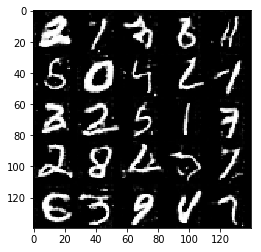

Epoch : 5/10 ... Step : 4310 ... d_loss : 0.2014431357383728 ... g_loss : 3.691737413406372
Epoch : 5/10 ... Step : 4320 ... d_loss : 0.37892991304397583 ... g_loss : 2.5031509399414062
Epoch : 5/10 ... Step : 4330 ... d_loss : 1.003964900970459 ... g_loss : 5.2112274169921875
Epoch : 5/10 ... Step : 4340 ... d_loss : 0.526769757270813 ... g_loss : 3.593379020690918
Epoch : 5/10 ... Step : 4350 ... d_loss : 1.0095105171203613 ... g_loss : 1.7271792888641357
Epoch : 5/10 ... Step : 4360 ... d_loss : 0.7087276577949524 ... g_loss : 2.101011276245117
Epoch : 5/10 ... Step : 4370 ... d_loss : 0.8372423052787781 ... g_loss : 5.273873329162598
Epoch : 5/10 ... Step : 4380 ... d_loss : 0.29693466424942017 ... g_loss : 3.5812125205993652
Epoch : 5/10 ... Step : 4390 ... d_loss : 0.280076801776886 ... g_loss : 3.9312872886657715
Epoch : 5/10 ... Step : 4400 ... d_loss : 0.22727635502815247 ... g_loss : 3.3000872135162354


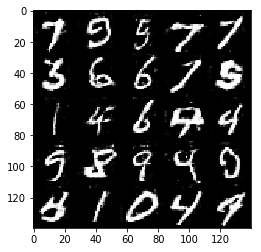

Epoch : 5/10 ... Step : 4410 ... d_loss : 0.1030583381652832 ... g_loss : 4.3264875411987305
Epoch : 5/10 ... Step : 4420 ... d_loss : 0.9289167523384094 ... g_loss : 1.6585991382598877
Epoch : 5/10 ... Step : 4430 ... d_loss : 0.664890468120575 ... g_loss : 3.1719794273376465
Epoch : 5/10 ... Step : 4440 ... d_loss : 0.4225424528121948 ... g_loss : 2.2871809005737305
Epoch : 5/10 ... Step : 4450 ... d_loss : 0.28235024213790894 ... g_loss : 3.2911791801452637
Epoch : 5/10 ... Step : 4460 ... d_loss : 0.37095654010772705 ... g_loss : 5.868144989013672
Epoch : 5/10 ... Step : 4470 ... d_loss : 1.3176757097244263 ... g_loss : 1.2114534378051758
Epoch : 5/10 ... Step : 4480 ... d_loss : 0.21857789158821106 ... g_loss : 4.154777526855469
Epoch : 5/10 ... Step : 4490 ... d_loss : 0.37084436416625977 ... g_loss : 5.204329967498779
Epoch : 5/10 ... Step : 4500 ... d_loss : 1.3902674913406372 ... g_loss : 2.6256492137908936


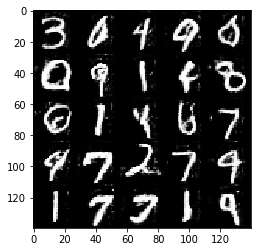

Epoch : 5/10 ... Step : 4510 ... d_loss : 0.5314638018608093 ... g_loss : 4.368988990783691
Epoch : 5/10 ... Step : 4520 ... d_loss : 0.6655048131942749 ... g_loss : 4.488977432250977
Epoch : 5/10 ... Step : 4530 ... d_loss : 0.602957546710968 ... g_loss : 5.092824459075928
Epoch : 5/10 ... Step : 4540 ... d_loss : 0.27585846185684204 ... g_loss : 3.3631606101989746
Epoch : 5/10 ... Step : 4550 ... d_loss : 0.16824975609779358 ... g_loss : 5.095488548278809
Epoch : 5/10 ... Step : 4560 ... d_loss : 0.5877707004547119 ... g_loss : 4.9968414306640625
Epoch : 5/10 ... Step : 4570 ... d_loss : 0.22984866797924042 ... g_loss : 3.9453210830688477
Epoch : 5/10 ... Step : 4580 ... d_loss : 0.05677759274840355 ... g_loss : 4.944132328033447
Epoch : 5/10 ... Step : 4590 ... d_loss : 0.03351409733295441 ... g_loss : 5.51926326751709
Epoch : 5/10 ... Step : 4600 ... d_loss : 0.08074355125427246 ... g_loss : 4.204440116882324


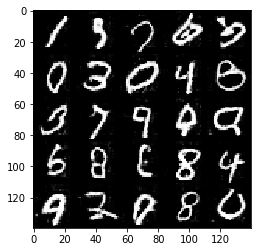

Epoch : 5/10 ... Step : 4610 ... d_loss : 0.16838602721691132 ... g_loss : 2.9618284702301025
Epoch : 5/10 ... Step : 4620 ... d_loss : 0.23934149742126465 ... g_loss : 4.551494598388672
Epoch : 5/10 ... Step : 4630 ... d_loss : 0.09697059541940689 ... g_loss : 4.092768669128418
Epoch : 5/10 ... Step : 4640 ... d_loss : 0.1027136892080307 ... g_loss : 4.165600776672363
Epoch : 5/10 ... Step : 4650 ... d_loss : 0.32027894258499146 ... g_loss : 2.89556884765625
Epoch : 5/10 ... Step : 4660 ... d_loss : 0.05034470558166504 ... g_loss : 4.694199085235596
Epoch : 5/10 ... Step : 4670 ... d_loss : 0.15547659993171692 ... g_loss : 7.11574649810791
Epoch : 5/10 ... Step : 4680 ... d_loss : 0.05762944743037224 ... g_loss : 6.489585876464844
Epoch : 6/10 ... Step : 4690 ... d_loss : 0.08901570737361908 ... g_loss : 4.865277290344238
Epoch : 6/10 ... Step : 4700 ... d_loss : 0.017642216756939888 ... g_loss : 5.426663398742676


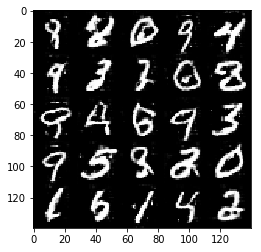

Epoch : 6/10 ... Step : 4710 ... d_loss : 0.09244583547115326 ... g_loss : 4.930052757263184
Epoch : 6/10 ... Step : 4720 ... d_loss : 0.17378990352153778 ... g_loss : 4.629166603088379
Epoch : 6/10 ... Step : 4730 ... d_loss : 0.25510576367378235 ... g_loss : 2.3093581199645996
Epoch : 6/10 ... Step : 4740 ... d_loss : 3.727717161178589 ... g_loss : 2.186795711517334
Epoch : 6/10 ... Step : 4750 ... d_loss : 0.9744437336921692 ... g_loss : 0.9372454285621643
Epoch : 6/10 ... Step : 4760 ... d_loss : 1.0248123407363892 ... g_loss : 2.890535593032837
Epoch : 6/10 ... Step : 4770 ... d_loss : 0.3226929008960724 ... g_loss : 3.0429294109344482
Epoch : 6/10 ... Step : 4780 ... d_loss : 0.3582284152507782 ... g_loss : 4.983440399169922
Epoch : 6/10 ... Step : 4790 ... d_loss : 0.44860678911209106 ... g_loss : 2.138859272003174
Epoch : 6/10 ... Step : 4800 ... d_loss : 0.2846756875514984 ... g_loss : 3.9829049110412598


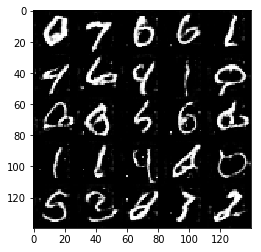

Epoch : 6/10 ... Step : 4810 ... d_loss : 0.4325634837150574 ... g_loss : 6.341652870178223
Epoch : 6/10 ... Step : 4820 ... d_loss : 1.3134418725967407 ... g_loss : 0.28900381922721863
Epoch : 6/10 ... Step : 4830 ... d_loss : 0.8104652166366577 ... g_loss : 1.4464924335479736
Epoch : 6/10 ... Step : 4840 ... d_loss : 0.17222389578819275 ... g_loss : 4.1913838386535645
Epoch : 6/10 ... Step : 4850 ... d_loss : 0.6410678625106812 ... g_loss : 6.738012313842773
Epoch : 6/10 ... Step : 4860 ... d_loss : 0.6637396812438965 ... g_loss : 4.536620140075684
Epoch : 6/10 ... Step : 4870 ... d_loss : 0.6036925315856934 ... g_loss : 4.238923072814941
Epoch : 6/10 ... Step : 4880 ... d_loss : 0.5395240783691406 ... g_loss : 3.2975401878356934
Epoch : 6/10 ... Step : 4890 ... d_loss : 1.8413379192352295 ... g_loss : 6.752371788024902
Epoch : 6/10 ... Step : 4900 ... d_loss : 1.7458668947219849 ... g_loss : 1.7581886053085327


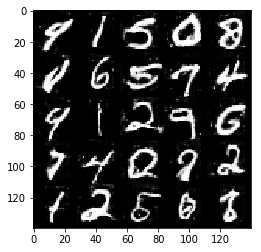

Epoch : 6/10 ... Step : 4910 ... d_loss : 0.584260106086731 ... g_loss : 3.408860683441162
Epoch : 6/10 ... Step : 4920 ... d_loss : 1.7100110054016113 ... g_loss : 2.6325249671936035
Epoch : 6/10 ... Step : 4930 ... d_loss : 2.0684187412261963 ... g_loss : 1.6965770721435547
Epoch : 6/10 ... Step : 4940 ... d_loss : 1.6089357137680054 ... g_loss : 0.7972310781478882
Epoch : 6/10 ... Step : 4950 ... d_loss : 0.8245968818664551 ... g_loss : 2.0523266792297363
Epoch : 6/10 ... Step : 4960 ... d_loss : 0.7879807353019714 ... g_loss : 1.505892038345337
Epoch : 6/10 ... Step : 4970 ... d_loss : 0.43703868985176086 ... g_loss : 2.9082236289978027
Epoch : 6/10 ... Step : 4980 ... d_loss : 0.1302841305732727 ... g_loss : 3.507145881652832
Epoch : 6/10 ... Step : 4990 ... d_loss : 0.2369925081729889 ... g_loss : 3.9890427589416504
Epoch : 6/10 ... Step : 5000 ... d_loss : 0.1754389852285385 ... g_loss : 4.762545585632324


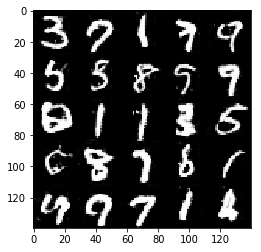

Epoch : 6/10 ... Step : 5010 ... d_loss : 0.10731343924999237 ... g_loss : 4.340545654296875
Epoch : 6/10 ... Step : 5020 ... d_loss : 0.15229927003383636 ... g_loss : 4.625977993011475
Epoch : 6/10 ... Step : 5030 ... d_loss : 0.18634310364723206 ... g_loss : 3.9593632221221924
Epoch : 6/10 ... Step : 5040 ... d_loss : 0.40611040592193604 ... g_loss : 2.3869094848632812
Epoch : 6/10 ... Step : 5050 ... d_loss : 2.372617244720459 ... g_loss : 1.5564740896224976
Epoch : 6/10 ... Step : 5060 ... d_loss : 0.6907771825790405 ... g_loss : 1.526402235031128
Epoch : 6/10 ... Step : 5070 ... d_loss : 0.8462308049201965 ... g_loss : 2.294734477996826
Epoch : 6/10 ... Step : 5080 ... d_loss : 0.7654008865356445 ... g_loss : 5.4105353355407715
Epoch : 6/10 ... Step : 5090 ... d_loss : 0.4526084065437317 ... g_loss : 3.2282254695892334
Epoch : 6/10 ... Step : 5100 ... d_loss : 0.4154263436794281 ... g_loss : 3.858574867248535


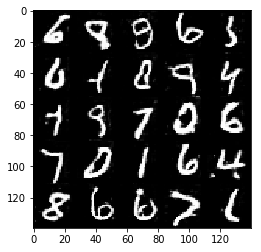

Epoch : 6/10 ... Step : 5110 ... d_loss : 0.521973192691803 ... g_loss : 3.846388816833496
Epoch : 6/10 ... Step : 5120 ... d_loss : 0.08060701936483383 ... g_loss : 4.182920455932617
Epoch : 6/10 ... Step : 5130 ... d_loss : 0.12906888127326965 ... g_loss : 3.8731417655944824
Epoch : 6/10 ... Step : 5140 ... d_loss : 0.10413096100091934 ... g_loss : 4.364293098449707
Epoch : 6/10 ... Step : 5150 ... d_loss : 0.1280343234539032 ... g_loss : 3.780402183532715
Epoch : 6/10 ... Step : 5160 ... d_loss : 0.17279452085494995 ... g_loss : 4.391156196594238
Epoch : 6/10 ... Step : 5170 ... d_loss : 0.06596966087818146 ... g_loss : 4.597660064697266
Epoch : 6/10 ... Step : 5180 ... d_loss : 0.057258106768131256 ... g_loss : 5.050132751464844
Epoch : 6/10 ... Step : 5190 ... d_loss : 0.05264609307050705 ... g_loss : 5.260942459106445
Epoch : 6/10 ... Step : 5200 ... d_loss : 0.5361393690109253 ... g_loss : 2.299546718597412


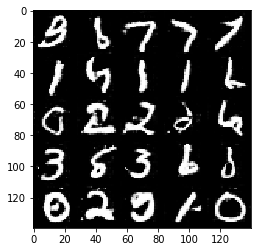

Epoch : 6/10 ... Step : 5210 ... d_loss : 2.5887258052825928 ... g_loss : 9.098322868347168
Epoch : 6/10 ... Step : 5220 ... d_loss : 0.5946263074874878 ... g_loss : 2.6472322940826416
Epoch : 6/10 ... Step : 5230 ... d_loss : 0.3084946274757385 ... g_loss : 3.7090678215026855
Epoch : 6/10 ... Step : 5240 ... d_loss : 0.15869218111038208 ... g_loss : 5.370797157287598
Epoch : 6/10 ... Step : 5250 ... d_loss : 0.2608226239681244 ... g_loss : 3.4104130268096924
Epoch : 6/10 ... Step : 5260 ... d_loss : 1.0661693811416626 ... g_loss : 1.7110341787338257
Epoch : 6/10 ... Step : 5270 ... d_loss : 0.4426395893096924 ... g_loss : 2.9633960723876953
Epoch : 6/10 ... Step : 5280 ... d_loss : 0.6735856533050537 ... g_loss : 4.177457809448242
Epoch : 6/10 ... Step : 5290 ... d_loss : 0.7438953518867493 ... g_loss : 3.5933148860931396
Epoch : 6/10 ... Step : 5300 ... d_loss : 0.8269935846328735 ... g_loss : 6.014006614685059


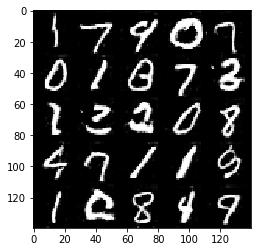

Epoch : 6/10 ... Step : 5310 ... d_loss : 0.9638194441795349 ... g_loss : 0.732622504234314
Epoch : 6/10 ... Step : 5320 ... d_loss : 0.3410460352897644 ... g_loss : 4.203519821166992
Epoch : 6/10 ... Step : 5330 ... d_loss : 0.15652620792388916 ... g_loss : 4.495200157165527
Epoch : 6/10 ... Step : 5340 ... d_loss : 0.2633787989616394 ... g_loss : 3.3853278160095215
Epoch : 6/10 ... Step : 5350 ... d_loss : 0.17988166213035583 ... g_loss : 4.339285373687744
Epoch : 6/10 ... Step : 5360 ... d_loss : 0.10880763083696365 ... g_loss : 4.973764419555664
Epoch : 6/10 ... Step : 5370 ... d_loss : 0.030289042741060257 ... g_loss : 5.370233535766602
Epoch : 6/10 ... Step : 5380 ... d_loss : 0.18979348242282867 ... g_loss : 4.259322166442871
Epoch : 6/10 ... Step : 5390 ... d_loss : 0.24773527681827545 ... g_loss : 5.577341079711914
Epoch : 6/10 ... Step : 5400 ... d_loss : 0.012787103652954102 ... g_loss : 5.757557392120361


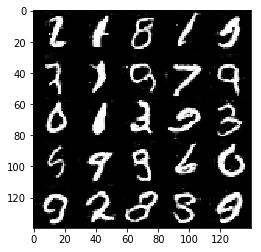

Epoch : 6/10 ... Step : 5410 ... d_loss : 0.2952938377857208 ... g_loss : 3.1642556190490723
Epoch : 6/10 ... Step : 5420 ... d_loss : 0.4918583333492279 ... g_loss : 3.3072428703308105
Epoch : 6/10 ... Step : 5430 ... d_loss : 0.249958798289299 ... g_loss : 5.0058064460754395
Epoch : 6/10 ... Step : 5440 ... d_loss : 0.20760196447372437 ... g_loss : 4.288188457489014
Epoch : 6/10 ... Step : 5450 ... d_loss : 0.3129323720932007 ... g_loss : 6.400469779968262
Epoch : 6/10 ... Step : 5460 ... d_loss : 0.25979846715927124 ... g_loss : 4.007099151611328
Epoch : 6/10 ... Step : 5470 ... d_loss : 0.5497262477874756 ... g_loss : 5.807229042053223
Epoch : 6/10 ... Step : 5480 ... d_loss : 1.2012939453125 ... g_loss : 6.863430023193359
Epoch : 6/10 ... Step : 5490 ... d_loss : 0.6274760961532593 ... g_loss : 4.416633129119873
Epoch : 6/10 ... Step : 5500 ... d_loss : 1.0762484073638916 ... g_loss : 4.881482124328613


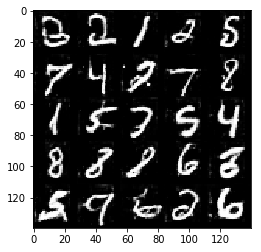

Epoch : 6/10 ... Step : 5510 ... d_loss : 1.0300933122634888 ... g_loss : 4.813640594482422
Epoch : 6/10 ... Step : 5520 ... d_loss : 0.2880244255065918 ... g_loss : 4.281001567840576
Epoch : 6/10 ... Step : 5530 ... d_loss : 0.1436138153076172 ... g_loss : 3.7537810802459717
Epoch : 6/10 ... Step : 5540 ... d_loss : 0.19169211387634277 ... g_loss : 3.7784411907196045
Epoch : 6/10 ... Step : 5550 ... d_loss : 0.09649496525526047 ... g_loss : 3.745152235031128
Epoch : 6/10 ... Step : 5560 ... d_loss : 0.28526753187179565 ... g_loss : 5.599993705749512
Epoch : 6/10 ... Step : 5570 ... d_loss : 0.2933739125728607 ... g_loss : 3.6453676223754883
Epoch : 6/10 ... Step : 5580 ... d_loss : 0.1903899908065796 ... g_loss : 3.5797648429870605
Epoch : 6/10 ... Step : 5590 ... d_loss : 0.02792230248451233 ... g_loss : 5.365738868713379
Epoch : 6/10 ... Step : 5600 ... d_loss : 0.643322765827179 ... g_loss : 3.335613965988159


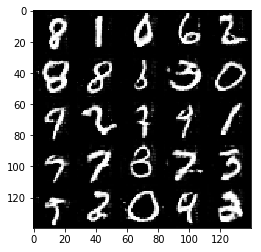

Epoch : 6/10 ... Step : 5610 ... d_loss : 0.1698286384344101 ... g_loss : 4.398332595825195
Epoch : 6/10 ... Step : 5620 ... d_loss : 0.7261695265769958 ... g_loss : 7.335690975189209
Epoch : 7/10 ... Step : 5630 ... d_loss : 0.15373989939689636 ... g_loss : 4.304743766784668
Epoch : 7/10 ... Step : 5640 ... d_loss : 0.23926445841789246 ... g_loss : 3.3374369144439697
Epoch : 7/10 ... Step : 5650 ... d_loss : 0.13823336362838745 ... g_loss : 4.02794075012207
Epoch : 7/10 ... Step : 5660 ... d_loss : 0.21189354360103607 ... g_loss : 4.148438453674316
Epoch : 7/10 ... Step : 5670 ... d_loss : 0.8443697690963745 ... g_loss : 3.2465686798095703
Epoch : 7/10 ... Step : 5680 ... d_loss : 1.0965341329574585 ... g_loss : 5.705691337585449
Epoch : 7/10 ... Step : 5690 ... d_loss : 0.5233832597732544 ... g_loss : 2.205422878265381
Epoch : 7/10 ... Step : 5700 ... d_loss : 1.318768858909607 ... g_loss : 2.6436266899108887


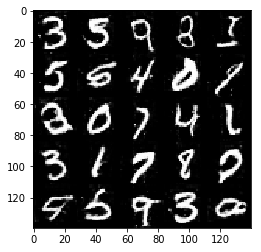

Epoch : 7/10 ... Step : 5710 ... d_loss : 0.20642001926898956 ... g_loss : 3.516324281692505
Epoch : 7/10 ... Step : 5720 ... d_loss : 0.3441249430179596 ... g_loss : 4.118350028991699
Epoch : 7/10 ... Step : 5730 ... d_loss : 0.4139905571937561 ... g_loss : 2.393380641937256
Epoch : 7/10 ... Step : 5740 ... d_loss : 0.20899124443531036 ... g_loss : 3.444350242614746
Epoch : 7/10 ... Step : 5750 ... d_loss : 0.14398574829101562 ... g_loss : 4.7330827713012695
Epoch : 7/10 ... Step : 5760 ... d_loss : 1.5069782733917236 ... g_loss : 0.5188373327255249
Epoch : 7/10 ... Step : 5770 ... d_loss : 0.28799283504486084 ... g_loss : 4.296754360198975
Epoch : 7/10 ... Step : 5780 ... d_loss : 0.28413158655166626 ... g_loss : 5.60566520690918
Epoch : 7/10 ... Step : 5790 ... d_loss : 0.3405107855796814 ... g_loss : 4.908329963684082
Epoch : 7/10 ... Step : 5800 ... d_loss : 0.1432686150074005 ... g_loss : 4.765865325927734


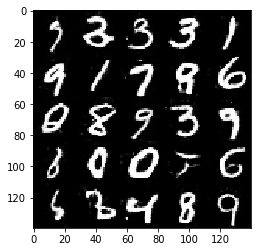

Epoch : 7/10 ... Step : 5810 ... d_loss : 0.09705126285552979 ... g_loss : 4.733290195465088
Epoch : 7/10 ... Step : 5820 ... d_loss : 0.024392029270529747 ... g_loss : 5.417802333831787
Epoch : 7/10 ... Step : 5830 ... d_loss : 0.06792791187763214 ... g_loss : 4.474757194519043
Epoch : 7/10 ... Step : 5840 ... d_loss : 0.023117076605558395 ... g_loss : 6.083377361297607
Epoch : 7/10 ... Step : 5850 ... d_loss : 0.0818248763680458 ... g_loss : 3.9261412620544434
Epoch : 7/10 ... Step : 5860 ... d_loss : 0.06720179319381714 ... g_loss : 5.425423622131348
Epoch : 7/10 ... Step : 5870 ... d_loss : 0.05604139342904091 ... g_loss : 4.810156345367432
Epoch : 7/10 ... Step : 5880 ... d_loss : 0.052974678575992584 ... g_loss : 5.684176445007324
Epoch : 7/10 ... Step : 5890 ... d_loss : 0.05421844869852066 ... g_loss : 5.290950298309326
Epoch : 7/10 ... Step : 5900 ... d_loss : 0.050932493060827255 ... g_loss : 5.472050666809082


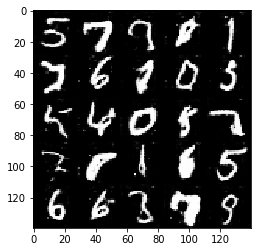

Epoch : 7/10 ... Step : 5910 ... d_loss : 0.2578391134738922 ... g_loss : 4.01547384262085
Epoch : 7/10 ... Step : 5920 ... d_loss : 0.05760490894317627 ... g_loss : 6.1173481941223145
Epoch : 7/10 ... Step : 5930 ... d_loss : 0.017367437481880188 ... g_loss : 6.17891263961792
Epoch : 7/10 ... Step : 5940 ... d_loss : 0.06722541898488998 ... g_loss : 4.321187496185303
Epoch : 7/10 ... Step : 5950 ... d_loss : 0.00888279639184475 ... g_loss : 6.878222465515137
Epoch : 7/10 ... Step : 5960 ... d_loss : 0.3073692321777344 ... g_loss : 4.851172924041748
Epoch : 7/10 ... Step : 5970 ... d_loss : 0.7359642386436462 ... g_loss : 1.344926118850708
Epoch : 7/10 ... Step : 5980 ... d_loss : 0.3477780818939209 ... g_loss : 5.732503414154053
Epoch : 7/10 ... Step : 5990 ... d_loss : 0.23763659596443176 ... g_loss : 4.6599016189575195
Epoch : 7/10 ... Step : 6000 ... d_loss : 0.2830021381378174 ... g_loss : 3.130481243133545


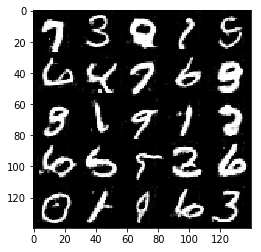

Epoch : 7/10 ... Step : 6010 ... d_loss : 0.06094885244965553 ... g_loss : 5.597577095031738
Epoch : 7/10 ... Step : 6020 ... d_loss : 0.07582234591245651 ... g_loss : 8.09333324432373
Epoch : 7/10 ... Step : 6030 ... d_loss : 0.037001676857471466 ... g_loss : 5.640501976013184
Epoch : 7/10 ... Step : 6040 ... d_loss : 0.26422977447509766 ... g_loss : 2.784025192260742
Epoch : 7/10 ... Step : 6050 ... d_loss : 0.06802453100681305 ... g_loss : 5.803046226501465
Epoch : 7/10 ... Step : 6060 ... d_loss : 0.10619205236434937 ... g_loss : 5.094736099243164
Epoch : 7/10 ... Step : 6070 ... d_loss : 0.03288344293832779 ... g_loss : 5.825798988342285
Epoch : 7/10 ... Step : 6080 ... d_loss : 0.734998881816864 ... g_loss : 5.750164985656738
Epoch : 7/10 ... Step : 6090 ... d_loss : 0.27672114968299866 ... g_loss : 4.256410121917725
Epoch : 7/10 ... Step : 6100 ... d_loss : 0.03757379576563835 ... g_loss : 6.92812442779541


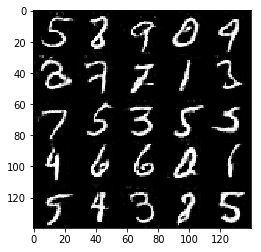

Epoch : 7/10 ... Step : 6110 ... d_loss : 0.03930037468671799 ... g_loss : 7.1726555824279785
Epoch : 7/10 ... Step : 6120 ... d_loss : 0.09523677080869675 ... g_loss : 5.461270809173584
Epoch : 7/10 ... Step : 6130 ... d_loss : 0.011306834407150745 ... g_loss : 6.8014373779296875
Epoch : 7/10 ... Step : 6140 ... d_loss : 0.35355842113494873 ... g_loss : 4.9966535568237305
Epoch : 7/10 ... Step : 6150 ... d_loss : 0.11655257642269135 ... g_loss : 4.922103404998779
Epoch : 7/10 ... Step : 6160 ... d_loss : 2.119551658630371 ... g_loss : 8.018935203552246
Epoch : 7/10 ... Step : 6170 ... d_loss : 0.4587033987045288 ... g_loss : 5.309537887573242
Epoch : 7/10 ... Step : 6180 ... d_loss : 0.2686750292778015 ... g_loss : 6.158562660217285
Epoch : 7/10 ... Step : 6190 ... d_loss : 0.13235944509506226 ... g_loss : 5.110962390899658
Epoch : 7/10 ... Step : 6200 ... d_loss : 0.35041484236717224 ... g_loss : 7.970481872558594


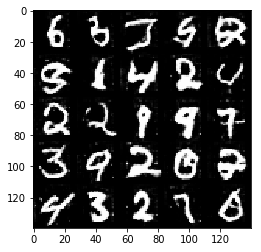

Epoch : 7/10 ... Step : 6210 ... d_loss : 1.358044981956482 ... g_loss : 7.479506969451904
Epoch : 7/10 ... Step : 6220 ... d_loss : 3.398406505584717 ... g_loss : 6.491769313812256
Epoch : 7/10 ... Step : 6230 ... d_loss : 3.1881232261657715 ... g_loss : 1.1629443168640137
Epoch : 7/10 ... Step : 6240 ... d_loss : 0.2421770542860031 ... g_loss : 4.137707710266113
Epoch : 7/10 ... Step : 6250 ... d_loss : 0.765205979347229 ... g_loss : 2.1890127658843994
Epoch : 7/10 ... Step : 6260 ... d_loss : 0.20210902392864227 ... g_loss : 4.076770782470703
Epoch : 7/10 ... Step : 6270 ... d_loss : 0.12342052161693573 ... g_loss : 4.948429107666016
Epoch : 7/10 ... Step : 6280 ... d_loss : 0.640880286693573 ... g_loss : 2.6560516357421875
Epoch : 7/10 ... Step : 6290 ... d_loss : 2.6175782680511475 ... g_loss : 2.9400060176849365
Epoch : 7/10 ... Step : 6300 ... d_loss : 0.3216474652290344 ... g_loss : 3.462750196456909


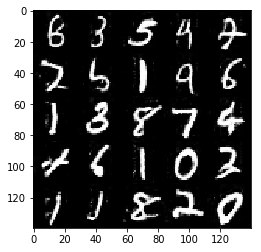

Epoch : 7/10 ... Step : 6310 ... d_loss : 0.4823201298713684 ... g_loss : 6.00891637802124
Epoch : 7/10 ... Step : 6320 ... d_loss : 0.16711056232452393 ... g_loss : 4.006435394287109
Epoch : 7/10 ... Step : 6330 ... d_loss : 0.11867885291576385 ... g_loss : 4.324739456176758
Epoch : 7/10 ... Step : 6340 ... d_loss : 1.550455093383789 ... g_loss : 2.053895950317383
Epoch : 7/10 ... Step : 6350 ... d_loss : 0.3158123791217804 ... g_loss : 4.504036903381348
Epoch : 7/10 ... Step : 6360 ... d_loss : 0.1390066295862198 ... g_loss : 5.162228107452393
Epoch : 7/10 ... Step : 6370 ... d_loss : 0.530299961566925 ... g_loss : 4.818005561828613
Epoch : 7/10 ... Step : 6380 ... d_loss : 0.19716519117355347 ... g_loss : 4.552743911743164
Epoch : 7/10 ... Step : 6390 ... d_loss : 1.4779757261276245 ... g_loss : 1.4733836650848389
Epoch : 7/10 ... Step : 6400 ... d_loss : 0.5511246919631958 ... g_loss : 3.4362425804138184


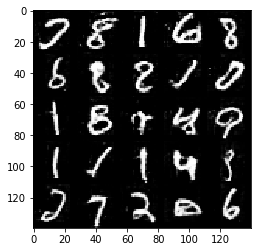

Epoch : 7/10 ... Step : 6410 ... d_loss : 0.9691775441169739 ... g_loss : 4.249008655548096
Epoch : 7/10 ... Step : 6420 ... d_loss : 0.38596871495246887 ... g_loss : 2.709530830383301
Epoch : 7/10 ... Step : 6430 ... d_loss : 0.6735803484916687 ... g_loss : 3.5812883377075195
Epoch : 7/10 ... Step : 6440 ... d_loss : 0.5962095260620117 ... g_loss : 2.9127421379089355
Epoch : 7/10 ... Step : 6450 ... d_loss : 0.756502628326416 ... g_loss : 2.634072780609131
Epoch : 7/10 ... Step : 6460 ... d_loss : 0.08910056203603745 ... g_loss : 4.292091369628906
Epoch : 7/10 ... Step : 6470 ... d_loss : 0.5694804191589355 ... g_loss : 4.610944747924805
Epoch : 7/10 ... Step : 6480 ... d_loss : 1.6615432500839233 ... g_loss : 0.9346472024917603
Epoch : 7/10 ... Step : 6490 ... d_loss : 0.5132297277450562 ... g_loss : 3.209324598312378
Epoch : 7/10 ... Step : 6500 ... d_loss : 0.39844682812690735 ... g_loss : 4.623481273651123


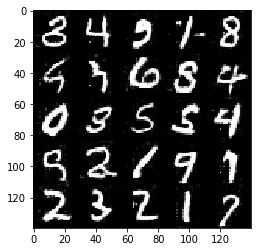

Epoch : 7/10 ... Step : 6510 ... d_loss : 0.4373283386230469 ... g_loss : 5.070298194885254
Epoch : 7/10 ... Step : 6520 ... d_loss : 0.06625533103942871 ... g_loss : 5.400296688079834
Epoch : 7/10 ... Step : 6530 ... d_loss : 0.2353183776140213 ... g_loss : 3.4728927612304688
Epoch : 7/10 ... Step : 6540 ... d_loss : 0.36728623509407043 ... g_loss : 5.988136291503906
Epoch : 7/10 ... Step : 6550 ... d_loss : 1.7023541927337646 ... g_loss : 0.8822206258773804
Epoch : 8/10 ... Step : 6560 ... d_loss : 3.366044282913208 ... g_loss : 1.4294378757476807
Epoch : 8/10 ... Step : 6570 ... d_loss : 0.352583646774292 ... g_loss : 3.8942372798919678
Epoch : 8/10 ... Step : 6580 ... d_loss : 0.2677851617336273 ... g_loss : 4.545865058898926
Epoch : 8/10 ... Step : 6590 ... d_loss : 0.3171163499355316 ... g_loss : 3.2212038040161133
Epoch : 8/10 ... Step : 6600 ... d_loss : 0.11396455764770508 ... g_loss : 4.70059871673584


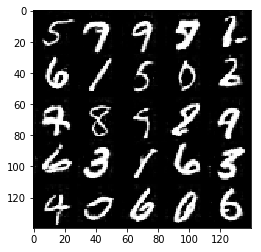

Epoch : 8/10 ... Step : 6610 ... d_loss : 0.2825580835342407 ... g_loss : 4.3478522300720215
Epoch : 8/10 ... Step : 6620 ... d_loss : 0.18152441084384918 ... g_loss : 3.9770336151123047
Epoch : 8/10 ... Step : 6630 ... d_loss : 0.1496727466583252 ... g_loss : 4.304780960083008
Epoch : 8/10 ... Step : 6640 ... d_loss : 0.07258494198322296 ... g_loss : 4.881650447845459
Epoch : 8/10 ... Step : 6650 ... d_loss : 0.25381404161453247 ... g_loss : 3.9052534103393555
Epoch : 8/10 ... Step : 6660 ... d_loss : 0.14679190516471863 ... g_loss : 5.875266075134277
Epoch : 8/10 ... Step : 6670 ... d_loss : 0.1464974284172058 ... g_loss : 4.7801361083984375
Epoch : 8/10 ... Step : 6680 ... d_loss : 0.1206500381231308 ... g_loss : 5.142016410827637
Epoch : 8/10 ... Step : 6690 ... d_loss : 0.027021897956728935 ... g_loss : 5.464584827423096
Epoch : 8/10 ... Step : 6700 ... d_loss : 0.08663848787546158 ... g_loss : 5.051026344299316


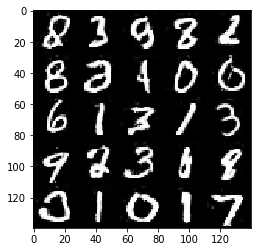

Epoch : 8/10 ... Step : 6710 ... d_loss : 0.08159652352333069 ... g_loss : 4.1985578536987305
Epoch : 8/10 ... Step : 6720 ... d_loss : 0.038410499691963196 ... g_loss : 4.356365203857422
Epoch : 8/10 ... Step : 6730 ... d_loss : 0.02338516153395176 ... g_loss : 5.03650426864624
Epoch : 8/10 ... Step : 6740 ... d_loss : 0.021156784147024155 ... g_loss : 5.135041236877441
Epoch : 8/10 ... Step : 6750 ... d_loss : 0.034728117287158966 ... g_loss : 5.049289703369141
Epoch : 8/10 ... Step : 6760 ... d_loss : 0.06462741643190384 ... g_loss : 4.336012840270996
Epoch : 8/10 ... Step : 6770 ... d_loss : 0.11665989458560944 ... g_loss : 5.073731422424316
Epoch : 8/10 ... Step : 6780 ... d_loss : 0.010741222649812698 ... g_loss : 5.780190467834473
Epoch : 8/10 ... Step : 6790 ... d_loss : 0.03165031969547272 ... g_loss : 5.703655242919922
Epoch : 8/10 ... Step : 6800 ... d_loss : 0.015326099470257759 ... g_loss : 6.9950032234191895


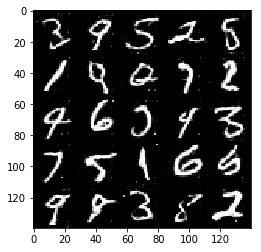

Epoch : 8/10 ... Step : 6810 ... d_loss : 0.1616724133491516 ... g_loss : 4.973468780517578
Epoch : 8/10 ... Step : 6820 ... d_loss : 1.4707207679748535 ... g_loss : 11.809415817260742
Epoch : 8/10 ... Step : 6830 ... d_loss : 0.5445502996444702 ... g_loss : 4.355686187744141
Epoch : 8/10 ... Step : 6840 ... d_loss : 0.5169481039047241 ... g_loss : 3.2315683364868164
Epoch : 8/10 ... Step : 6850 ... d_loss : 0.13557250797748566 ... g_loss : 4.665370941162109
Epoch : 8/10 ... Step : 6860 ... d_loss : 0.06725112348794937 ... g_loss : 4.579063415527344
Epoch : 8/10 ... Step : 6870 ... d_loss : 0.09523981064558029 ... g_loss : 4.794229984283447
Epoch : 8/10 ... Step : 6880 ... d_loss : 0.10349870473146439 ... g_loss : 4.775876045227051
Epoch : 8/10 ... Step : 6890 ... d_loss : 0.04582969471812248 ... g_loss : 5.671006679534912
Epoch : 8/10 ... Step : 6900 ... d_loss : 0.02967769280076027 ... g_loss : 6.1418137550354


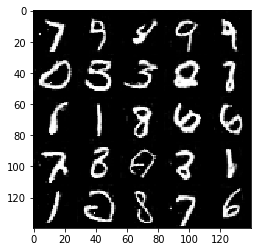

Epoch : 8/10 ... Step : 6910 ... d_loss : 0.045884523540735245 ... g_loss : 5.242278575897217
Epoch : 8/10 ... Step : 6920 ... d_loss : 0.14952175319194794 ... g_loss : 3.526087760925293
Epoch : 8/10 ... Step : 6930 ... d_loss : 0.014486514031887054 ... g_loss : 6.4348530769348145
Epoch : 8/10 ... Step : 6940 ... d_loss : 0.019009359180927277 ... g_loss : 5.614012718200684
Epoch : 8/10 ... Step : 6950 ... d_loss : 0.025204889476299286 ... g_loss : 5.1401190757751465
Epoch : 8/10 ... Step : 6960 ... d_loss : 0.07412385940551758 ... g_loss : 4.441115379333496
Epoch : 8/10 ... Step : 6970 ... d_loss : 0.007435818202793598 ... g_loss : 6.884222030639648
Epoch : 8/10 ... Step : 6980 ... d_loss : 3.8511757850646973 ... g_loss : 13.737140655517578
Epoch : 8/10 ... Step : 6990 ... d_loss : 0.8307238817214966 ... g_loss : 1.502221941947937
Epoch : 8/10 ... Step : 7000 ... d_loss : 0.8426401615142822 ... g_loss : 2.485095977783203


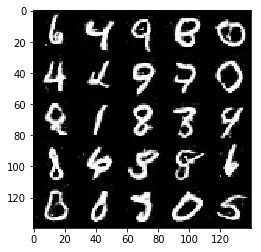

Epoch : 8/10 ... Step : 7010 ... d_loss : 0.3740556240081787 ... g_loss : 4.561698913574219
Epoch : 8/10 ... Step : 7020 ... d_loss : 0.8775414228439331 ... g_loss : 2.4035634994506836
Epoch : 8/10 ... Step : 7030 ... d_loss : 0.2238444685935974 ... g_loss : 3.7813806533813477
Epoch : 8/10 ... Step : 7040 ... d_loss : 0.15043029189109802 ... g_loss : 4.1201019287109375
Epoch : 8/10 ... Step : 7050 ... d_loss : 0.14967307448387146 ... g_loss : 4.990384578704834
Epoch : 8/10 ... Step : 7060 ... d_loss : 0.3575742244720459 ... g_loss : 4.025999069213867
Epoch : 8/10 ... Step : 7070 ... d_loss : 0.5007606744766235 ... g_loss : 3.53810453414917
Epoch : 8/10 ... Step : 7080 ... d_loss : 0.1674249917268753 ... g_loss : 4.546578407287598
Epoch : 8/10 ... Step : 7090 ... d_loss : 0.4031786024570465 ... g_loss : 5.372525691986084
Epoch : 8/10 ... Step : 7100 ... d_loss : 0.5394906997680664 ... g_loss : 3.9126834869384766


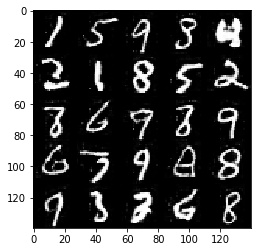

Epoch : 8/10 ... Step : 7110 ... d_loss : 0.2254367619752884 ... g_loss : 5.033327102661133
Epoch : 8/10 ... Step : 7120 ... d_loss : 0.1136808916926384 ... g_loss : 4.547408103942871
Epoch : 8/10 ... Step : 7130 ... d_loss : 0.17243440449237823 ... g_loss : 5.028343200683594
Epoch : 8/10 ... Step : 7140 ... d_loss : 0.028054947033524513 ... g_loss : 5.053067684173584
Epoch : 8/10 ... Step : 7150 ... d_loss : 0.03670808672904968 ... g_loss : 5.533154487609863
Epoch : 8/10 ... Step : 7160 ... d_loss : 0.012681552208960056 ... g_loss : 6.2691521644592285
Epoch : 8/10 ... Step : 7170 ... d_loss : 0.013751138933002949 ... g_loss : 6.159887313842773
Epoch : 8/10 ... Step : 7180 ... d_loss : 0.02221427857875824 ... g_loss : 5.624387741088867
Epoch : 8/10 ... Step : 7190 ... d_loss : 0.3049319386482239 ... g_loss : 5.927455902099609
Epoch : 8/10 ... Step : 7200 ... d_loss : 0.19604678452014923 ... g_loss : 5.720058441162109


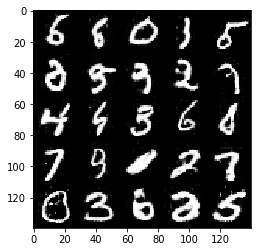

Epoch : 8/10 ... Step : 7210 ... d_loss : 0.02540198341012001 ... g_loss : 5.118842124938965
Epoch : 8/10 ... Step : 7220 ... d_loss : 0.042691946029663086 ... g_loss : 5.58624267578125
Epoch : 8/10 ... Step : 7230 ... d_loss : 0.05953044816851616 ... g_loss : 5.313941478729248
Epoch : 8/10 ... Step : 7240 ... d_loss : 0.12026609480381012 ... g_loss : 5.480389595031738
Epoch : 8/10 ... Step : 7250 ... d_loss : 0.3190840184688568 ... g_loss : 5.618704795837402
Epoch : 8/10 ... Step : 7260 ... d_loss : 1.7932709455490112 ... g_loss : 6.614612102508545
Epoch : 8/10 ... Step : 7270 ... d_loss : 1.8097338676452637 ... g_loss : 7.698023796081543
Epoch : 8/10 ... Step : 7280 ... d_loss : 0.7624855637550354 ... g_loss : 5.123142242431641
Epoch : 8/10 ... Step : 7290 ... d_loss : 0.12528645992279053 ... g_loss : 4.472404479980469
Epoch : 8/10 ... Step : 7300 ... d_loss : 0.5918808579444885 ... g_loss : 4.601323127746582


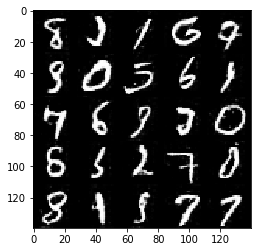

Epoch : 8/10 ... Step : 7310 ... d_loss : 0.2348114401102066 ... g_loss : 4.63798189163208
Epoch : 8/10 ... Step : 7320 ... d_loss : 1.9421344995498657 ... g_loss : 5.876347541809082
Epoch : 8/10 ... Step : 7330 ... d_loss : 0.8474411964416504 ... g_loss : 1.9068129062652588
Epoch : 8/10 ... Step : 7340 ... d_loss : 0.6478233337402344 ... g_loss : 4.554998397827148
Epoch : 8/10 ... Step : 7350 ... d_loss : 0.10336187481880188 ... g_loss : 4.308013916015625
Epoch : 8/10 ... Step : 7360 ... d_loss : 0.4774428606033325 ... g_loss : 4.705096244812012
Epoch : 8/10 ... Step : 7370 ... d_loss : 0.47260782122612 ... g_loss : 2.137207269668579
Epoch : 8/10 ... Step : 7380 ... d_loss : 1.0686267614364624 ... g_loss : 7.0197038650512695
Epoch : 8/10 ... Step : 7390 ... d_loss : 0.051163557916879654 ... g_loss : 4.877223014831543
Epoch : 8/10 ... Step : 7400 ... d_loss : 0.3599926829338074 ... g_loss : 6.893950462341309


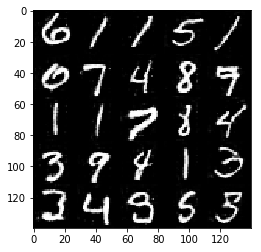

Epoch : 8/10 ... Step : 7410 ... d_loss : 0.8277201056480408 ... g_loss : 1.8116278648376465
Epoch : 8/10 ... Step : 7420 ... d_loss : 1.0832741260528564 ... g_loss : 3.1335697174072266
Epoch : 8/10 ... Step : 7430 ... d_loss : 0.15250447392463684 ... g_loss : 4.343381881713867
Epoch : 8/10 ... Step : 7440 ... d_loss : 0.1266697496175766 ... g_loss : 4.043994903564453
Epoch : 8/10 ... Step : 7450 ... d_loss : 0.3550424873828888 ... g_loss : 3.431610345840454
Epoch : 8/10 ... Step : 7460 ... d_loss : 0.04729665443301201 ... g_loss : 5.314352989196777
Epoch : 8/10 ... Step : 7470 ... d_loss : 0.03618132323026657 ... g_loss : 4.693302154541016
Epoch : 8/10 ... Step : 7480 ... d_loss : 0.1616870015859604 ... g_loss : 4.094493865966797
Epoch : 8/10 ... Step : 7490 ... d_loss : 0.25787240266799927 ... g_loss : 4.60886812210083
Epoch : 9/10 ... Step : 7500 ... d_loss : 0.3818618357181549 ... g_loss : 2.0849928855895996


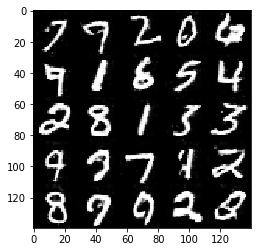

Epoch : 9/10 ... Step : 7510 ... d_loss : 0.4042336344718933 ... g_loss : 2.466742753982544
Epoch : 9/10 ... Step : 7520 ... d_loss : 0.8818703889846802 ... g_loss : 2.6488864421844482
Epoch : 9/10 ... Step : 7530 ... d_loss : 0.40899068117141724 ... g_loss : 4.628652572631836
Epoch : 9/10 ... Step : 7540 ... d_loss : 0.8671266436576843 ... g_loss : 1.91530442237854
Epoch : 9/10 ... Step : 7550 ... d_loss : 0.18957504630088806 ... g_loss : 6.274324417114258
Epoch : 9/10 ... Step : 7560 ... d_loss : 0.09760737419128418 ... g_loss : 5.155766010284424
Epoch : 9/10 ... Step : 7570 ... d_loss : 0.08985822647809982 ... g_loss : 4.995553970336914
Epoch : 9/10 ... Step : 7580 ... d_loss : 0.2858957052230835 ... g_loss : 6.214184761047363
Epoch : 9/10 ... Step : 7590 ... d_loss : 0.1089886873960495 ... g_loss : 4.853036880493164
Epoch : 9/10 ... Step : 7600 ... d_loss : 0.0636819452047348 ... g_loss : 4.879247188568115


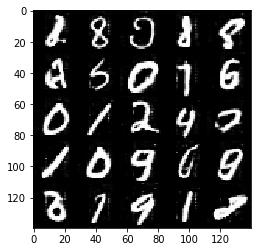

Epoch : 9/10 ... Step : 7610 ... d_loss : 0.2514427602291107 ... g_loss : 4.507157325744629
Epoch : 9/10 ... Step : 7620 ... d_loss : 0.08562549948692322 ... g_loss : 5.354313373565674
Epoch : 9/10 ... Step : 7630 ... d_loss : 0.06112661212682724 ... g_loss : 4.217367172241211
Epoch : 9/10 ... Step : 7640 ... d_loss : 3.355363368988037 ... g_loss : 8.952975273132324
Epoch : 9/10 ... Step : 7650 ... d_loss : 0.5968196392059326 ... g_loss : 1.8571504354476929
Epoch : 9/10 ... Step : 7660 ... d_loss : 2.4099020957946777 ... g_loss : 10.840856552124023
Epoch : 9/10 ... Step : 7670 ... d_loss : 0.32325902581214905 ... g_loss : 4.644920349121094
Epoch : 9/10 ... Step : 7680 ... d_loss : 0.34181463718414307 ... g_loss : 4.072692394256592
Epoch : 9/10 ... Step : 7690 ... d_loss : 0.5349408984184265 ... g_loss : 8.30923080444336
Epoch : 9/10 ... Step : 7700 ... d_loss : 1.347314476966858 ... g_loss : 2.4087533950805664


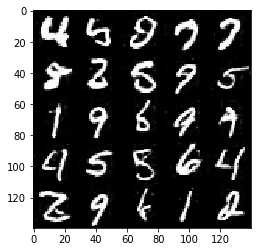

Epoch : 9/10 ... Step : 7710 ... d_loss : 3.1922595500946045 ... g_loss : 0.929093062877655
Epoch : 9/10 ... Step : 7720 ... d_loss : 0.3270491659641266 ... g_loss : 3.3716976642608643
Epoch : 9/10 ... Step : 7730 ... d_loss : 0.11915597319602966 ... g_loss : 4.264631271362305
Epoch : 9/10 ... Step : 7740 ... d_loss : 0.19134655594825745 ... g_loss : 3.7829418182373047
Epoch : 9/10 ... Step : 7750 ... d_loss : 0.12623992562294006 ... g_loss : 5.097655296325684
Epoch : 9/10 ... Step : 7760 ... d_loss : 0.04131944477558136 ... g_loss : 4.219832897186279
Epoch : 9/10 ... Step : 7770 ... d_loss : 0.24725347757339478 ... g_loss : 3.8838419914245605
Epoch : 9/10 ... Step : 7780 ... d_loss : 0.20176473259925842 ... g_loss : 3.9456818103790283
Epoch : 9/10 ... Step : 7790 ... d_loss : 0.2410006821155548 ... g_loss : 3.7313034534454346
Epoch : 9/10 ... Step : 7800 ... d_loss : 0.7769963145256042 ... g_loss : 3.09781551361084


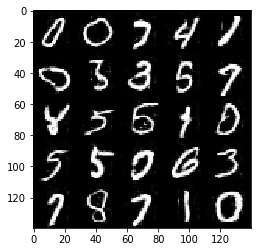

Epoch : 9/10 ... Step : 7810 ... d_loss : 0.09105034172534943 ... g_loss : 5.858297348022461
Epoch : 9/10 ... Step : 7820 ... d_loss : 1.287761926651001 ... g_loss : 8.637648582458496
Epoch : 9/10 ... Step : 7830 ... d_loss : 0.25370925664901733 ... g_loss : 3.1233646869659424
Epoch : 9/10 ... Step : 7840 ... d_loss : 0.12436895817518234 ... g_loss : 4.027643203735352
Epoch : 9/10 ... Step : 7850 ... d_loss : 0.42842575907707214 ... g_loss : 6.7212114334106445
Epoch : 9/10 ... Step : 7860 ... d_loss : 0.02553064003586769 ... g_loss : 5.959301948547363
Epoch : 9/10 ... Step : 7870 ... d_loss : 0.07257004082202911 ... g_loss : 4.993178367614746
Epoch : 9/10 ... Step : 7880 ... d_loss : 0.12290985882282257 ... g_loss : 5.682604789733887
Epoch : 9/10 ... Step : 7890 ... d_loss : 0.11228688061237335 ... g_loss : 5.093951225280762
Epoch : 9/10 ... Step : 7900 ... d_loss : 0.02030842751264572 ... g_loss : 6.039531230926514


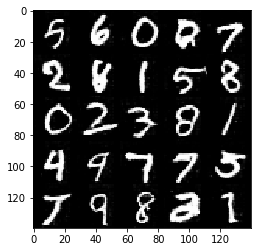

Epoch : 9/10 ... Step : 7910 ... d_loss : 0.3373602628707886 ... g_loss : 2.8591480255126953
Epoch : 9/10 ... Step : 7920 ... d_loss : 2.013003349304199 ... g_loss : 7.242922782897949
Epoch : 9/10 ... Step : 7930 ... d_loss : 1.0448851585388184 ... g_loss : 5.3938446044921875
Epoch : 9/10 ... Step : 7940 ... d_loss : 0.1395171880722046 ... g_loss : 4.779216766357422
Epoch : 9/10 ... Step : 7950 ... d_loss : 1.1888431310653687 ... g_loss : 1.7881970405578613
Epoch : 9/10 ... Step : 7960 ... d_loss : 0.39960333704948425 ... g_loss : 5.675043106079102
Epoch : 9/10 ... Step : 7970 ... d_loss : 0.10337439924478531 ... g_loss : 5.381010055541992
Epoch : 9/10 ... Step : 7980 ... d_loss : 0.06035660207271576 ... g_loss : 4.8448662757873535
Epoch : 9/10 ... Step : 7990 ... d_loss : 0.04484140872955322 ... g_loss : 5.660824298858643
Epoch : 9/10 ... Step : 8000 ... d_loss : 0.11053695529699326 ... g_loss : 5.1335530281066895


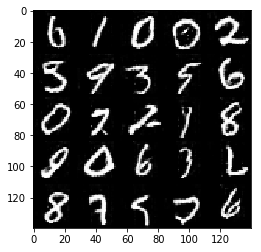

Epoch : 9/10 ... Step : 8010 ... d_loss : 0.19868412613868713 ... g_loss : 4.539027214050293
Epoch : 9/10 ... Step : 8020 ... d_loss : 0.23338942229747772 ... g_loss : 3.417448043823242
Epoch : 9/10 ... Step : 8030 ... d_loss : 0.0840044766664505 ... g_loss : 4.930631160736084
Epoch : 9/10 ... Step : 8040 ... d_loss : 0.12576743960380554 ... g_loss : 4.844372749328613
Epoch : 9/10 ... Step : 8050 ... d_loss : 0.23476581275463104 ... g_loss : 5.02703857421875
Epoch : 9/10 ... Step : 8060 ... d_loss : 0.06928572803735733 ... g_loss : 5.930112838745117
Epoch : 9/10 ... Step : 8070 ... d_loss : 0.3391801714897156 ... g_loss : 8.504150390625
Epoch : 9/10 ... Step : 8080 ... d_loss : 0.9143259525299072 ... g_loss : 4.881326675415039
Epoch : 9/10 ... Step : 8090 ... d_loss : 0.5843212604522705 ... g_loss : 3.632030725479126
Epoch : 9/10 ... Step : 8100 ... d_loss : 0.4431460499763489 ... g_loss : 2.623769760131836


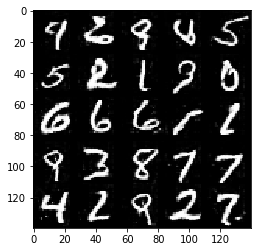

Epoch : 9/10 ... Step : 8110 ... d_loss : 0.39128702878952026 ... g_loss : 3.0341410636901855
Epoch : 9/10 ... Step : 8120 ... d_loss : 0.45025867223739624 ... g_loss : 4.568940162658691
Epoch : 9/10 ... Step : 8130 ... d_loss : 0.07877494394779205 ... g_loss : 4.415193557739258
Epoch : 9/10 ... Step : 8140 ... d_loss : 0.1930781900882721 ... g_loss : 4.3216047286987305
Epoch : 9/10 ... Step : 8150 ... d_loss : 0.06701169908046722 ... g_loss : 4.526359558105469
Epoch : 9/10 ... Step : 8160 ... d_loss : 0.44790351390838623 ... g_loss : 6.914380073547363
Epoch : 9/10 ... Step : 8170 ... d_loss : 0.7383239269256592 ... g_loss : 3.1212944984436035
Epoch : 9/10 ... Step : 8180 ... d_loss : 1.2359864711761475 ... g_loss : 0.708024263381958
Epoch : 9/10 ... Step : 8190 ... d_loss : 0.44317877292633057 ... g_loss : 5.607193946838379
Epoch : 9/10 ... Step : 8200 ... d_loss : 0.0683806911110878 ... g_loss : 4.23142147064209


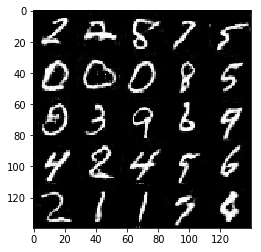

Epoch : 9/10 ... Step : 8210 ... d_loss : 0.17106449604034424 ... g_loss : 4.1974053382873535
Epoch : 9/10 ... Step : 8220 ... d_loss : 0.5314615368843079 ... g_loss : 4.158939361572266
Epoch : 9/10 ... Step : 8230 ... d_loss : 0.46965786814689636 ... g_loss : 3.441784143447876
Epoch : 9/10 ... Step : 8240 ... d_loss : 0.22155646979808807 ... g_loss : 5.061676025390625
Epoch : 9/10 ... Step : 8250 ... d_loss : 0.447399765253067 ... g_loss : 10.114240646362305
Epoch : 9/10 ... Step : 8260 ... d_loss : 0.7012417912483215 ... g_loss : 3.553061008453369
Epoch : 9/10 ... Step : 8270 ... d_loss : 0.32708972692489624 ... g_loss : 2.9488325119018555
Epoch : 9/10 ... Step : 8280 ... d_loss : 1.1856789588928223 ... g_loss : 5.217775821685791
Epoch : 9/10 ... Step : 8290 ... d_loss : 0.6705029010772705 ... g_loss : 2.3119425773620605
Epoch : 9/10 ... Step : 8300 ... d_loss : 0.04415960982441902 ... g_loss : 5.458360195159912


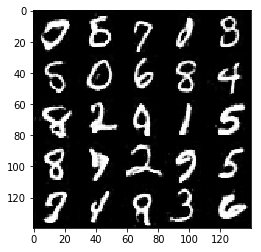

Epoch : 9/10 ... Step : 8310 ... d_loss : 0.5358302593231201 ... g_loss : 2.540712833404541
Epoch : 9/10 ... Step : 8320 ... d_loss : 0.08369970321655273 ... g_loss : 4.874293327331543
Epoch : 9/10 ... Step : 8330 ... d_loss : 0.06307505071163177 ... g_loss : 5.895158767700195
Epoch : 9/10 ... Step : 8340 ... d_loss : 0.05525326728820801 ... g_loss : 5.846868515014648
Epoch : 9/10 ... Step : 8350 ... d_loss : 0.11104336380958557 ... g_loss : 4.5625386238098145
Epoch : 9/10 ... Step : 8360 ... d_loss : 0.17994453012943268 ... g_loss : 4.300849914550781
Epoch : 9/10 ... Step : 8370 ... d_loss : 0.06649880111217499 ... g_loss : 5.582294464111328
Epoch : 9/10 ... Step : 8380 ... d_loss : 0.189071387052536 ... g_loss : 4.384601593017578
Epoch : 9/10 ... Step : 8390 ... d_loss : 0.24489636719226837 ... g_loss : 6.95518159866333
Epoch : 9/10 ... Step : 8400 ... d_loss : 0.032989244908094406 ... g_loss : 4.771982669830322


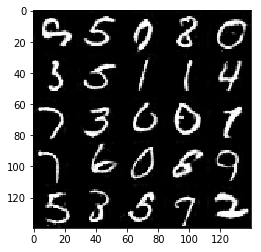

Epoch : 9/10 ... Step : 8410 ... d_loss : 0.2812952399253845 ... g_loss : 6.683961868286133
Epoch : 9/10 ... Step : 8420 ... d_loss : 0.013032998889684677 ... g_loss : 6.033252716064453
Epoch : 9/10 ... Step : 8430 ... d_loss : 0.025741275399923325 ... g_loss : 5.687305927276611
Epoch : 10/10 ... Step : 8440 ... d_loss : 0.025143297389149666 ... g_loss : 6.795241355895996
Epoch : 10/10 ... Step : 8450 ... d_loss : 0.10931483656167984 ... g_loss : 4.972301483154297
Epoch : 10/10 ... Step : 8460 ... d_loss : 0.06018202751874924 ... g_loss : 5.99501895904541
Epoch : 10/10 ... Step : 8470 ... d_loss : 0.01033933274447918 ... g_loss : 6.130795478820801
Epoch : 10/10 ... Step : 8480 ... d_loss : 0.026147909462451935 ... g_loss : 5.659487724304199
Epoch : 10/10 ... Step : 8490 ... d_loss : 0.067345030605793 ... g_loss : 6.12630558013916
Epoch : 10/10 ... Step : 8500 ... d_loss : 0.0075219059363007545 ... g_loss : 7.363768100738525


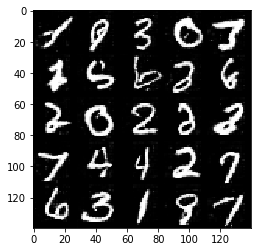

Epoch : 10/10 ... Step : 8510 ... d_loss : 0.012602985836565495 ... g_loss : 7.851783752441406
Epoch : 10/10 ... Step : 8520 ... d_loss : 0.01894901692867279 ... g_loss : 5.627358436584473
Epoch : 10/10 ... Step : 8530 ... d_loss : 0.014539474621415138 ... g_loss : 5.615194797515869
Epoch : 10/10 ... Step : 8540 ... d_loss : 0.2479589432477951 ... g_loss : 2.4038538932800293
Epoch : 10/10 ... Step : 8550 ... d_loss : 0.035542309284210205 ... g_loss : 5.237662315368652
Epoch : 10/10 ... Step : 8560 ... d_loss : 0.02361782267689705 ... g_loss : 5.962926864624023
Epoch : 10/10 ... Step : 8570 ... d_loss : 0.18749170005321503 ... g_loss : 7.021846771240234
Epoch : 10/10 ... Step : 8580 ... d_loss : 0.08598189055919647 ... g_loss : 5.823880195617676
Epoch : 10/10 ... Step : 8590 ... d_loss : 0.3220805525779724 ... g_loss : 4.317268371582031
Epoch : 10/10 ... Step : 8600 ... d_loss : 0.263752281665802 ... g_loss : 4.75369930267334


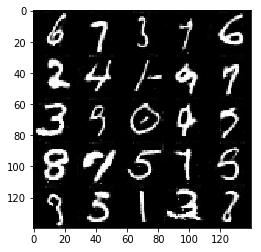

Epoch : 10/10 ... Step : 8610 ... d_loss : 0.09312573075294495 ... g_loss : 6.443691730499268
Epoch : 10/10 ... Step : 8620 ... d_loss : 4.208970546722412 ... g_loss : 3.112842082977295
Epoch : 10/10 ... Step : 8630 ... d_loss : 0.24016140401363373 ... g_loss : 5.050767421722412
Epoch : 10/10 ... Step : 8640 ... d_loss : 0.4369646906852722 ... g_loss : 5.350590705871582
Epoch : 10/10 ... Step : 8650 ... d_loss : 1.0843929052352905 ... g_loss : 4.901951313018799
Epoch : 10/10 ... Step : 8660 ... d_loss : 0.5985576510429382 ... g_loss : 1.9347938299179077
Epoch : 10/10 ... Step : 8670 ... d_loss : 0.6615407466888428 ... g_loss : 5.1403937339782715
Epoch : 10/10 ... Step : 8680 ... d_loss : 0.6490510702133179 ... g_loss : 7.712409019470215
Epoch : 10/10 ... Step : 8690 ... d_loss : 0.5330877304077148 ... g_loss : 8.1532564163208
Epoch : 10/10 ... Step : 8700 ... d_loss : 0.1083986759185791 ... g_loss : 5.1294755935668945


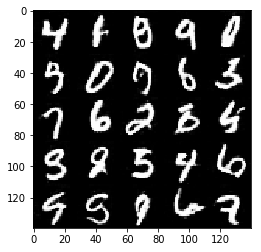

Epoch : 10/10 ... Step : 8710 ... d_loss : 0.12686023116111755 ... g_loss : 5.848816871643066
Epoch : 10/10 ... Step : 8720 ... d_loss : 1.4600204229354858 ... g_loss : 0.5341081619262695
Epoch : 10/10 ... Step : 8730 ... d_loss : 0.1037520319223404 ... g_loss : 7.496457576751709
Epoch : 10/10 ... Step : 8740 ... d_loss : 0.2748379111289978 ... g_loss : 3.2423577308654785
Epoch : 10/10 ... Step : 8750 ... d_loss : 0.7986506819725037 ... g_loss : 7.523667335510254
Epoch : 10/10 ... Step : 8760 ... d_loss : 0.9881500601768494 ... g_loss : 2.2623472213745117
Epoch : 10/10 ... Step : 8770 ... d_loss : 0.2616402804851532 ... g_loss : 3.4571921825408936
Epoch : 10/10 ... Step : 8780 ... d_loss : 0.5033376216888428 ... g_loss : 4.506999969482422
Epoch : 10/10 ... Step : 8790 ... d_loss : 0.12621194124221802 ... g_loss : 5.516800880432129
Epoch : 10/10 ... Step : 8800 ... d_loss : 0.10757303237915039 ... g_loss : 5.655228614807129


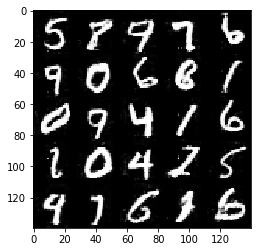

Epoch : 10/10 ... Step : 8810 ... d_loss : 0.37965095043182373 ... g_loss : 5.855498790740967
Epoch : 10/10 ... Step : 8820 ... d_loss : 1.6344645023345947 ... g_loss : 1.31074857711792
Epoch : 10/10 ... Step : 8830 ... d_loss : 1.776843547821045 ... g_loss : 5.052001953125
Epoch : 10/10 ... Step : 8840 ... d_loss : 1.831725835800171 ... g_loss : 0.7961486577987671
Epoch : 10/10 ... Step : 8850 ... d_loss : 0.36329254508018494 ... g_loss : 4.231732368469238
Epoch : 10/10 ... Step : 8860 ... d_loss : 0.3647105395793915 ... g_loss : 4.984014511108398
Epoch : 10/10 ... Step : 8870 ... d_loss : 0.3348284959793091 ... g_loss : 2.8671042919158936
Epoch : 10/10 ... Step : 8880 ... d_loss : 0.13347995281219482 ... g_loss : 4.530256748199463
Epoch : 10/10 ... Step : 8890 ... d_loss : 0.08504369854927063 ... g_loss : 4.775420188903809
Epoch : 10/10 ... Step : 8900 ... d_loss : 0.0735631138086319 ... g_loss : 4.863027572631836


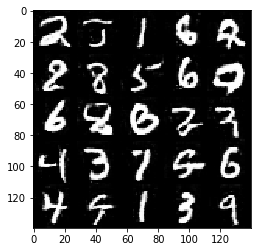

Epoch : 10/10 ... Step : 8910 ... d_loss : 0.5083227753639221 ... g_loss : 8.727542877197266
Epoch : 10/10 ... Step : 8920 ... d_loss : 0.18465644121170044 ... g_loss : 5.157007217407227
Epoch : 10/10 ... Step : 8930 ... d_loss : 0.13928547501564026 ... g_loss : 3.228536605834961
Epoch : 10/10 ... Step : 8940 ... d_loss : 0.1630071997642517 ... g_loss : 5.42637825012207
Epoch : 10/10 ... Step : 8950 ... d_loss : 1.2174274921417236 ... g_loss : 3.7761635780334473
Epoch : 10/10 ... Step : 8960 ... d_loss : 0.5976399183273315 ... g_loss : 3.040825366973877
Epoch : 10/10 ... Step : 8970 ... d_loss : 0.22763469815254211 ... g_loss : 3.2224369049072266
Epoch : 10/10 ... Step : 8980 ... d_loss : 0.649651288986206 ... g_loss : 5.579798698425293
Epoch : 10/10 ... Step : 8990 ... d_loss : 0.03867976367473602 ... g_loss : 5.213484764099121
Epoch : 10/10 ... Step : 9000 ... d_loss : 0.42648762464523315 ... g_loss : 4.431921005249023


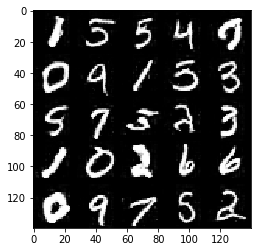

Epoch : 10/10 ... Step : 9010 ... d_loss : 0.7176114916801453 ... g_loss : 6.963593482971191
Epoch : 10/10 ... Step : 9020 ... d_loss : 0.5666561126708984 ... g_loss : 4.155869007110596
Epoch : 10/10 ... Step : 9030 ... d_loss : 0.11272989213466644 ... g_loss : 4.999504566192627
Epoch : 10/10 ... Step : 9040 ... d_loss : 0.08841568231582642 ... g_loss : 4.573569297790527
Epoch : 10/10 ... Step : 9050 ... d_loss : 0.1417345553636551 ... g_loss : 4.299032211303711
Epoch : 10/10 ... Step : 9060 ... d_loss : 0.5630269646644592 ... g_loss : 7.504783630371094
Epoch : 10/10 ... Step : 9070 ... d_loss : 0.23506267368793488 ... g_loss : 6.16700553894043
Epoch : 10/10 ... Step : 9080 ... d_loss : 0.028826724737882614 ... g_loss : 5.226724624633789
Epoch : 10/10 ... Step : 9090 ... d_loss : 0.10017924010753632 ... g_loss : 8.412052154541016
Epoch : 10/10 ... Step : 9100 ... d_loss : 0.07008880376815796 ... g_loss : 4.588155746459961


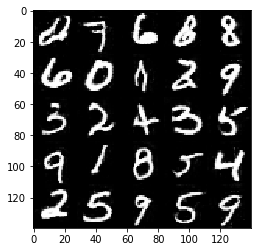

Epoch : 10/10 ... Step : 9110 ... d_loss : 0.016904745250940323 ... g_loss : 6.349428653717041
Epoch : 10/10 ... Step : 9120 ... d_loss : 0.09405761957168579 ... g_loss : 4.58247184753418
Epoch : 10/10 ... Step : 9130 ... d_loss : 0.045009955763816833 ... g_loss : 6.635502815246582
Epoch : 10/10 ... Step : 9140 ... d_loss : 0.03307946026325226 ... g_loss : 5.447530746459961
Epoch : 10/10 ... Step : 9150 ... d_loss : 0.45312929153442383 ... g_loss : 6.178813934326172
Epoch : 10/10 ... Step : 9160 ... d_loss : 0.045109424740076065 ... g_loss : 8.362558364868164
Epoch : 10/10 ... Step : 9170 ... d_loss : 0.062018632888793945 ... g_loss : 5.34347677230835
Epoch : 10/10 ... Step : 9180 ... d_loss : 0.08079024404287338 ... g_loss : 5.815608978271484
Epoch : 10/10 ... Step : 9190 ... d_loss : 0.05467529967427254 ... g_loss : 4.445769309997559
Epoch : 10/10 ... Step : 9200 ... d_loss : 0.19487079977989197 ... g_loss : 6.059539318084717


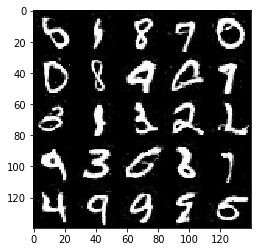

Epoch : 10/10 ... Step : 9210 ... d_loss : 0.22116905450820923 ... g_loss : 3.861384630203247
Epoch : 10/10 ... Step : 9220 ... d_loss : 1.7499115467071533 ... g_loss : 2.2347054481506348
Epoch : 10/10 ... Step : 9230 ... d_loss : 0.12081797420978546 ... g_loss : 5.437183380126953
Epoch : 10/10 ... Step : 9240 ... d_loss : 0.01917901448905468 ... g_loss : 6.939822196960449
Epoch : 10/10 ... Step : 9250 ... d_loss : 0.10914123058319092 ... g_loss : 5.375083923339844
Epoch : 10/10 ... Step : 9260 ... d_loss : 0.10312144458293915 ... g_loss : 5.889101505279541
Epoch : 10/10 ... Step : 9270 ... d_loss : 0.02201795019209385 ... g_loss : 6.084514617919922
Epoch : 10/10 ... Step : 9280 ... d_loss : 0.07486442476511002 ... g_loss : 5.19714879989624
Epoch : 10/10 ... Step : 9290 ... d_loss : 0.05262728035449982 ... g_loss : 4.99378776550293
Epoch : 10/10 ... Step : 9300 ... d_loss : 0.05909232422709465 ... g_loss : 4.847980976104736


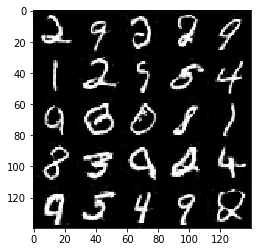

Epoch : 10/10 ... Step : 9310 ... d_loss : 0.03068324364721775 ... g_loss : 5.809871673583984
Epoch : 10/10 ... Step : 9320 ... d_loss : 1.3452600240707397 ... g_loss : 0.7153559923171997
Epoch : 10/10 ... Step : 9330 ... d_loss : 0.6744118928909302 ... g_loss : 8.476202011108398
Epoch : 10/10 ... Step : 9340 ... d_loss : 0.19640986621379852 ... g_loss : 3.3702633380889893
Epoch : 10/10 ... Step : 9350 ... d_loss : 2.9986300468444824 ... g_loss : 1.3983550071716309
Epoch : 10/10 ... Step : 9360 ... d_loss : 0.8579264879226685 ... g_loss : 6.541449069976807
Epoch : 10/10 ... Step : 9370 ... d_loss : 0.028427165001630783 ... g_loss : 7.290179252624512


In [87]:
batch_size = 64
z_dim = 100
learning_rate = 3e-3
beta1 = .5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch : 1/10 ... Step : 100 ... d_loss : 0.276090532541275 ... g_loss : 7.946306228637695
Epoch : 1/10 ... Step : 200 ... d_loss : 0.4930230379104614 ... g_loss : 7.372992515563965
Epoch : 1/10 ... Step : 300 ... d_loss : 0.5517822504043579 ... g_loss : 4.447853088378906
Epoch : 1/10 ... Step : 400 ... d_loss : 0.7986226081848145 ... g_loss : 2.0185770988464355
Epoch : 1/10 ... Step : 500 ... d_loss : 1.2721617221832275 ... g_loss : 2.4557392597198486
Epoch : 1/10 ... Step : 600 ... d_loss : 0.9766598343849182 ... g_loss : 2.350954055786133
Epoch : 1/10 ... Step : 700 ... d_loss : 1.061157464981079 ... g_loss : 2.4358301162719727
Epoch : 1/10 ... Step : 800 ... d_loss : 1.1672296524047852 ... g_loss : 1.8027163743972778
Epoch : 1/10 ... Step : 900 ... d_loss : 1.6221281290054321 ... g_loss : 3.5671944618225098
Epoch : 1/10 ... Step : 1000 ... d_loss : 1.0373295545578003 ... g_loss : 2.998807907104492


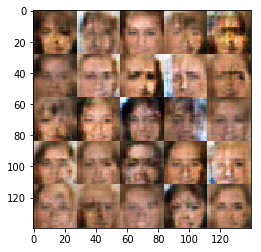

Epoch : 1/10 ... Step : 1100 ... d_loss : 1.1935968399047852 ... g_loss : 1.9688359498977661
Epoch : 1/10 ... Step : 1200 ... d_loss : 1.2537930011749268 ... g_loss : 1.2126582860946655
Epoch : 1/10 ... Step : 1300 ... d_loss : 0.9132339954376221 ... g_loss : 2.275480270385742
Epoch : 1/10 ... Step : 1400 ... d_loss : 1.2980901002883911 ... g_loss : 3.1403751373291016
Epoch : 1/10 ... Step : 1500 ... d_loss : 0.9228848218917847 ... g_loss : 1.241837978363037
Epoch : 1/10 ... Step : 1600 ... d_loss : 1.315888524055481 ... g_loss : 2.451977014541626
Epoch : 1/10 ... Step : 1700 ... d_loss : 0.9177507758140564 ... g_loss : 3.095423698425293
Epoch : 1/10 ... Step : 1800 ... d_loss : 1.277606725692749 ... g_loss : 1.3688812255859375
Epoch : 1/10 ... Step : 1900 ... d_loss : 0.986170768737793 ... g_loss : 1.9964361190795898
Epoch : 1/10 ... Step : 2000 ... d_loss : 1.0518923997879028 ... g_loss : 2.5830845832824707


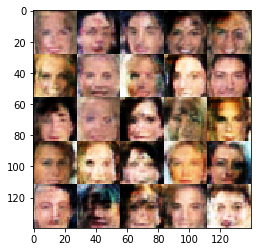

Epoch : 1/10 ... Step : 2100 ... d_loss : 0.980575442314148 ... g_loss : 1.716047763824463
Epoch : 1/10 ... Step : 2200 ... d_loss : 0.7019271850585938 ... g_loss : 1.8456089496612549
Epoch : 1/10 ... Step : 2300 ... d_loss : 0.7612940073013306 ... g_loss : 2.375460386276245
Epoch : 1/10 ... Step : 2400 ... d_loss : 1.142967700958252 ... g_loss : 1.5365822315216064
Epoch : 1/10 ... Step : 2500 ... d_loss : 0.9833749532699585 ... g_loss : 1.5736494064331055
Epoch : 1/10 ... Step : 2600 ... d_loss : 1.3212558031082153 ... g_loss : 1.7395437955856323
Epoch : 1/10 ... Step : 2700 ... d_loss : 1.0128319263458252 ... g_loss : 1.5958023071289062
Epoch : 1/10 ... Step : 2800 ... d_loss : 1.1938549280166626 ... g_loss : 1.3919132947921753
Epoch : 1/10 ... Step : 2900 ... d_loss : 1.1105329990386963 ... g_loss : 1.8811490535736084
Epoch : 1/10 ... Step : 3000 ... d_loss : 1.0103437900543213 ... g_loss : 1.3165602684020996


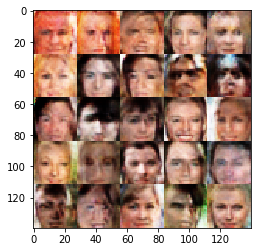

Epoch : 1/10 ... Step : 3100 ... d_loss : 0.8804258108139038 ... g_loss : 1.5781946182250977
Epoch : 2/10 ... Step : 3200 ... d_loss : 1.0533196926116943 ... g_loss : 2.0449299812316895
Epoch : 2/10 ... Step : 3300 ... d_loss : 1.0396111011505127 ... g_loss : 1.7734143733978271
Epoch : 2/10 ... Step : 3400 ... d_loss : 1.216396450996399 ... g_loss : 1.3083497285842896
Epoch : 2/10 ... Step : 3500 ... d_loss : 0.8309692144393921 ... g_loss : 2.2075929641723633
Epoch : 2/10 ... Step : 3600 ... d_loss : 0.9828373193740845 ... g_loss : 1.773605465888977
Epoch : 2/10 ... Step : 3700 ... d_loss : 0.9848295450210571 ... g_loss : 3.1024365425109863
Epoch : 2/10 ... Step : 3800 ... d_loss : 0.9401560425758362 ... g_loss : 2.2019243240356445
Epoch : 2/10 ... Step : 3900 ... d_loss : 1.4543629884719849 ... g_loss : 1.047347068786621
Epoch : 2/10 ... Step : 4000 ... d_loss : 0.7480818629264832 ... g_loss : 2.766585350036621


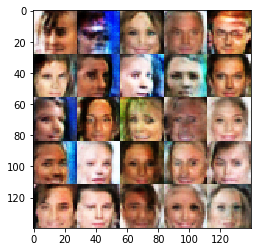

Epoch : 2/10 ... Step : 4100 ... d_loss : 1.1502654552459717 ... g_loss : 1.4453022480010986
Epoch : 2/10 ... Step : 4200 ... d_loss : 1.403666377067566 ... g_loss : 3.304753541946411
Epoch : 2/10 ... Step : 4300 ... d_loss : 1.026075839996338 ... g_loss : 1.3864378929138184
Epoch : 2/10 ... Step : 4400 ... d_loss : 1.0760143995285034 ... g_loss : 2.1319215297698975
Epoch : 2/10 ... Step : 4500 ... d_loss : 1.3108898401260376 ... g_loss : 2.742766857147217
Epoch : 2/10 ... Step : 4600 ... d_loss : 1.506540060043335 ... g_loss : 1.1960229873657227
Epoch : 2/10 ... Step : 4700 ... d_loss : 1.1399314403533936 ... g_loss : 4.008848667144775
Epoch : 2/10 ... Step : 4800 ... d_loss : 0.7025111317634583 ... g_loss : 1.8710358142852783
Epoch : 2/10 ... Step : 4900 ... d_loss : 1.1308298110961914 ... g_loss : 2.3569982051849365
Epoch : 2/10 ... Step : 5000 ... d_loss : 0.6579766273498535 ... g_loss : 2.144453525543213


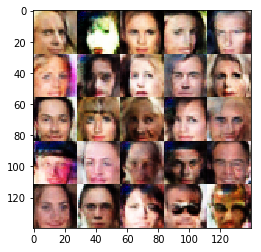

Epoch : 2/10 ... Step : 5100 ... d_loss : 0.794979989528656 ... g_loss : 2.1908798217773438
Epoch : 2/10 ... Step : 5200 ... d_loss : 0.7883226871490479 ... g_loss : 2.3531274795532227
Epoch : 2/10 ... Step : 5300 ... d_loss : 1.1059893369674683 ... g_loss : 2.5480332374572754
Epoch : 2/10 ... Step : 5400 ... d_loss : 0.8394128680229187 ... g_loss : 2.898387908935547
Epoch : 2/10 ... Step : 5500 ... d_loss : 0.6525368690490723 ... g_loss : 1.7932838201522827
Epoch : 2/10 ... Step : 5600 ... d_loss : 0.9933221340179443 ... g_loss : 2.732285976409912
Epoch : 2/10 ... Step : 5700 ... d_loss : 1.815030574798584 ... g_loss : 0.6647165417671204
Epoch : 2/10 ... Step : 5800 ... d_loss : 0.3374061584472656 ... g_loss : 3.555860996246338
Epoch : 2/10 ... Step : 5900 ... d_loss : 1.0418013334274292 ... g_loss : 0.9163437485694885
Epoch : 2/10 ... Step : 6000 ... d_loss : 0.9274795055389404 ... g_loss : 1.5534119606018066


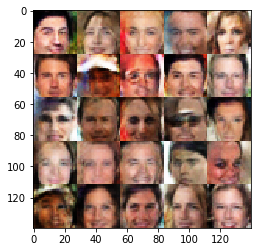

Epoch : 2/10 ... Step : 6100 ... d_loss : 1.0513306856155396 ... g_loss : 2.5936737060546875
Epoch : 2/10 ... Step : 6200 ... d_loss : 0.7317748069763184 ... g_loss : 3.2648637294769287
Epoch : 2/10 ... Step : 6300 ... d_loss : 0.9945372343063354 ... g_loss : 1.7116374969482422
Epoch : 3/10 ... Step : 6400 ... d_loss : 0.6944642066955566 ... g_loss : 2.5919370651245117
Epoch : 3/10 ... Step : 6500 ... d_loss : 1.3452577590942383 ... g_loss : 4.543449401855469
Epoch : 3/10 ... Step : 6600 ... d_loss : 0.6878675222396851 ... g_loss : 2.296178102493286
Epoch : 3/10 ... Step : 6700 ... d_loss : 0.813028872013092 ... g_loss : 2.1186952590942383
Epoch : 3/10 ... Step : 6800 ... d_loss : 0.7233805656433105 ... g_loss : 2.300830364227295
Epoch : 3/10 ... Step : 6900 ... d_loss : 0.7770169377326965 ... g_loss : 2.75323486328125
Epoch : 3/10 ... Step : 7000 ... d_loss : 1.0308586359024048 ... g_loss : 1.4336400032043457


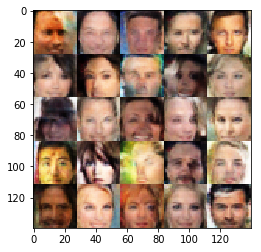

Epoch : 3/10 ... Step : 7100 ... d_loss : 1.5989021062850952 ... g_loss : 0.7926545143127441
Epoch : 3/10 ... Step : 7200 ... d_loss : 0.8878282904624939 ... g_loss : 2.640322685241699
Epoch : 3/10 ... Step : 7300 ... d_loss : 0.841025173664093 ... g_loss : 1.9909579753875732
Epoch : 3/10 ... Step : 7400 ... d_loss : 0.7161791324615479 ... g_loss : 3.7084102630615234
Epoch : 3/10 ... Step : 7500 ... d_loss : 0.9519063234329224 ... g_loss : 1.9285218715667725
Epoch : 3/10 ... Step : 7600 ... d_loss : 0.6772498488426208 ... g_loss : 3.6724724769592285
Epoch : 3/10 ... Step : 7700 ... d_loss : 1.0046195983886719 ... g_loss : 1.606713056564331
Epoch : 3/10 ... Step : 7800 ... d_loss : 0.7340472936630249 ... g_loss : 2.3877339363098145
Epoch : 3/10 ... Step : 7900 ... d_loss : 0.6103564500808716 ... g_loss : 2.388050079345703
Epoch : 3/10 ... Step : 8000 ... d_loss : 1.90255606174469 ... g_loss : 4.127630710601807


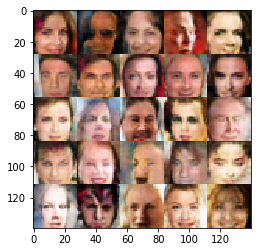

Epoch : 3/10 ... Step : 8100 ... d_loss : 0.8253073692321777 ... g_loss : 1.6821367740631104
Epoch : 3/10 ... Step : 8200 ... d_loss : 1.077162504196167 ... g_loss : 2.130045175552368
Epoch : 3/10 ... Step : 8300 ... d_loss : 0.8370654582977295 ... g_loss : 1.717990517616272
Epoch : 3/10 ... Step : 8400 ... d_loss : 0.9179205894470215 ... g_loss : 3.027897357940674
Epoch : 3/10 ... Step : 8500 ... d_loss : 0.7762618660926819 ... g_loss : 3.4756534099578857
Epoch : 3/10 ... Step : 8600 ... d_loss : 0.8043072819709778 ... g_loss : 1.7576829195022583
Epoch : 3/10 ... Step : 8700 ... d_loss : 0.8062787055969238 ... g_loss : 1.5709490776062012
Epoch : 3/10 ... Step : 8800 ... d_loss : 0.7743768095970154 ... g_loss : 2.53987979888916
Epoch : 3/10 ... Step : 8900 ... d_loss : 0.5028189420700073 ... g_loss : 2.766352653503418
Epoch : 3/10 ... Step : 9000 ... d_loss : 0.9073359966278076 ... g_loss : 3.59749698638916


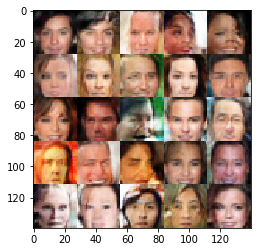

Epoch : 3/10 ... Step : 9100 ... d_loss : 0.7329654097557068 ... g_loss : 2.858391523361206
Epoch : 3/10 ... Step : 9200 ... d_loss : 0.6823814511299133 ... g_loss : 3.1438064575195312
Epoch : 3/10 ... Step : 9300 ... d_loss : 0.882191002368927 ... g_loss : 3.844712495803833
Epoch : 3/10 ... Step : 9400 ... d_loss : 0.4378136694431305 ... g_loss : 2.3995633125305176
Epoch : 4/10 ... Step : 9500 ... d_loss : 0.8612440228462219 ... g_loss : 2.706346273422241
Epoch : 4/10 ... Step : 9600 ... d_loss : 1.3807734251022339 ... g_loss : 1.6906564235687256
Epoch : 4/10 ... Step : 9700 ... d_loss : 1.057225227355957 ... g_loss : 1.6074702739715576
Epoch : 4/10 ... Step : 9800 ... d_loss : 0.47769269347190857 ... g_loss : 3.713808536529541
Epoch : 4/10 ... Step : 9900 ... d_loss : 1.0058733224868774 ... g_loss : 1.3367810249328613
Epoch : 4/10 ... Step : 10000 ... d_loss : 1.397682547569275 ... g_loss : 1.5888102054595947


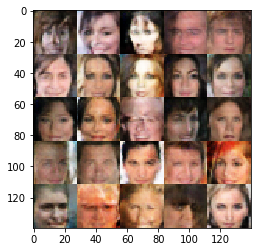

Epoch : 4/10 ... Step : 10100 ... d_loss : 0.5938043594360352 ... g_loss : 2.1247968673706055
Epoch : 4/10 ... Step : 10200 ... d_loss : 0.48378825187683105 ... g_loss : 3.384702205657959
Epoch : 4/10 ... Step : 10300 ... d_loss : 0.6172981858253479 ... g_loss : 2.182236671447754
Epoch : 4/10 ... Step : 10400 ... d_loss : 1.9491949081420898 ... g_loss : 6.947451591491699
Epoch : 4/10 ... Step : 10500 ... d_loss : 1.39873468875885 ... g_loss : 1.5114185810089111
Epoch : 4/10 ... Step : 10600 ... d_loss : 0.48040392994880676 ... g_loss : 3.094996452331543
Epoch : 4/10 ... Step : 10700 ... d_loss : 0.431443989276886 ... g_loss : 3.181121826171875
Epoch : 4/10 ... Step : 10800 ... d_loss : 0.3543647527694702 ... g_loss : 2.7621233463287354
Epoch : 4/10 ... Step : 10900 ... d_loss : 0.7008713483810425 ... g_loss : 2.506425619125366
Epoch : 4/10 ... Step : 11800 ... d_loss : 0.8754024505615234 ... g_loss : 3.7965898513793945
Epoch : 4/10 ... Step : 11900 ... d_loss : 0.6336652040481567 ... g

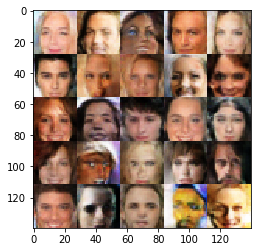

Epoch : 4/10 ... Step : 12100 ... d_loss : 0.6211192011833191 ... g_loss : 4.35465145111084
Epoch : 4/10 ... Step : 12200 ... d_loss : 1.658236026763916 ... g_loss : 2.0307936668395996
Epoch : 4/10 ... Step : 12300 ... d_loss : 0.6643416285514832 ... g_loss : 1.6215614080429077
Epoch : 4/10 ... Step : 12400 ... d_loss : 1.5037124156951904 ... g_loss : 2.4061150550842285
Epoch : 4/10 ... Step : 12500 ... d_loss : 0.7234397530555725 ... g_loss : 2.240448236465454
Epoch : 4/10 ... Step : 12600 ... d_loss : 0.3444484770298004 ... g_loss : 2.8798298835754395
Epoch : 5/10 ... Step : 12700 ... d_loss : 0.7536215782165527 ... g_loss : 2.1119399070739746
Epoch : 5/10 ... Step : 12800 ... d_loss : 0.7769818305969238 ... g_loss : 2.476907968521118
Epoch : 5/10 ... Step : 12900 ... d_loss : 0.69501793384552 ... g_loss : 1.570034146308899
Epoch : 5/10 ... Step : 13000 ... d_loss : 0.6170004606246948 ... g_loss : 2.6995766162872314


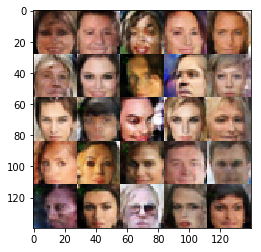

Epoch : 5/10 ... Step : 13100 ... d_loss : 0.8058935403823853 ... g_loss : 2.419325351715088
Epoch : 5/10 ... Step : 13200 ... d_loss : 0.5407514572143555 ... g_loss : 2.5013070106506348
Epoch : 5/10 ... Step : 13300 ... d_loss : 0.8988519310951233 ... g_loss : 4.083812713623047
Epoch : 5/10 ... Step : 13400 ... d_loss : 0.8947582840919495 ... g_loss : 1.4938912391662598
Epoch : 5/10 ... Step : 13500 ... d_loss : 1.064157485961914 ... g_loss : 2.2391250133514404
Epoch : 5/10 ... Step : 13600 ... d_loss : 0.5946565270423889 ... g_loss : 3.9684195518493652
Epoch : 5/10 ... Step : 13700 ... d_loss : 0.43883684277534485 ... g_loss : 2.951200485229492
Epoch : 5/10 ... Step : 13800 ... d_loss : 0.6556768417358398 ... g_loss : 3.880678176879883
Epoch : 5/10 ... Step : 13900 ... d_loss : 1.002642273902893 ... g_loss : 2.3056423664093018
Epoch : 5/10 ... Step : 14000 ... d_loss : 0.6752640008926392 ... g_loss : 3.771655797958374


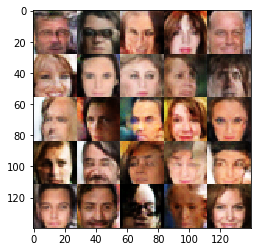

Epoch : 5/10 ... Step : 14100 ... d_loss : 0.8202133178710938 ... g_loss : 1.6891754865646362
Epoch : 5/10 ... Step : 14200 ... d_loss : 0.3674400746822357 ... g_loss : 4.801840782165527
Epoch : 5/10 ... Step : 14300 ... d_loss : 1.2117040157318115 ... g_loss : 2.08512544631958
Epoch : 5/10 ... Step : 14400 ... d_loss : 1.2354344129562378 ... g_loss : 4.165423393249512
Epoch : 5/10 ... Step : 14500 ... d_loss : 0.5540699362754822 ... g_loss : 2.5937650203704834
Epoch : 5/10 ... Step : 14600 ... d_loss : 1.6435577869415283 ... g_loss : 5.541172504425049
Epoch : 5/10 ... Step : 14700 ... d_loss : 0.6583627462387085 ... g_loss : 2.199554920196533
Epoch : 5/10 ... Step : 14800 ... d_loss : 0.7239829301834106 ... g_loss : 3.034944534301758
Epoch : 5/10 ... Step : 14900 ... d_loss : 0.5993967056274414 ... g_loss : 4.690726280212402
Epoch : 5/10 ... Step : 15000 ... d_loss : 0.7905285358428955 ... g_loss : 1.5383784770965576


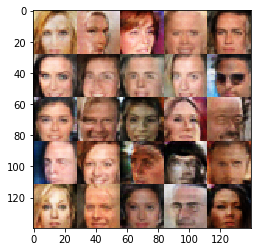

Epoch : 5/10 ... Step : 15100 ... d_loss : 0.5516192317008972 ... g_loss : 4.919063091278076
Epoch : 5/10 ... Step : 15200 ... d_loss : 0.46049878001213074 ... g_loss : 2.7882323265075684
Epoch : 5/10 ... Step : 15300 ... d_loss : 0.40533751249313354 ... g_loss : 2.6480488777160645
Epoch : 5/10 ... Step : 15400 ... d_loss : 0.4720645546913147 ... g_loss : 3.9926233291625977
Epoch : 5/10 ... Step : 15500 ... d_loss : 0.46884599328041077 ... g_loss : 3.5910186767578125
Epoch : 5/10 ... Step : 15600 ... d_loss : 0.18347638845443726 ... g_loss : 2.7826948165893555
Epoch : 5/10 ... Step : 15700 ... d_loss : 0.7544447183609009 ... g_loss : 3.6865592002868652
Epoch : 5/10 ... Step : 15800 ... d_loss : 0.9582101702690125 ... g_loss : 4.296856880187988
Epoch : 6/10 ... Step : 15900 ... d_loss : 0.7313748002052307 ... g_loss : 4.2700300216674805
Epoch : 6/10 ... Step : 16000 ... d_loss : 1.1943225860595703 ... g_loss : 5.52423095703125


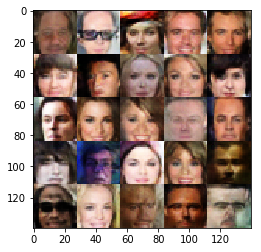

Epoch : 6/10 ... Step : 16100 ... d_loss : 0.385989785194397 ... g_loss : 3.679933547973633
Epoch : 6/10 ... Step : 16200 ... d_loss : 0.5406052470207214 ... g_loss : 2.537419557571411
Epoch : 6/10 ... Step : 16300 ... d_loss : 0.1806148886680603 ... g_loss : 4.26736307144165
Epoch : 6/10 ... Step : 16400 ... d_loss : 1.7986392974853516 ... g_loss : 0.7476070523262024
Epoch : 6/10 ... Step : 16500 ... d_loss : 0.4983261227607727 ... g_loss : 2.920379638671875
Epoch : 6/10 ... Step : 16600 ... d_loss : 0.8890631198883057 ... g_loss : 4.82114839553833
Epoch : 6/10 ... Step : 16700 ... d_loss : 1.08734929561615 ... g_loss : 4.238160610198975
Epoch : 6/10 ... Step : 16800 ... d_loss : 0.3918936252593994 ... g_loss : 3.202500820159912
Epoch : 6/10 ... Step : 16900 ... d_loss : 0.5661864876747131 ... g_loss : 2.9998488426208496
Epoch : 6/10 ... Step : 17000 ... d_loss : 0.23620469868183136 ... g_loss : 2.891629457473755


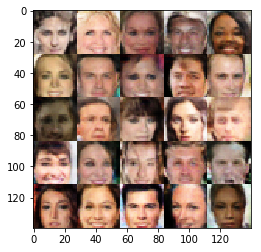

Epoch : 6/10 ... Step : 17100 ... d_loss : 1.912022352218628 ... g_loss : 6.851269721984863
Epoch : 6/10 ... Step : 17200 ... d_loss : 0.2957904636859894 ... g_loss : 4.145904064178467
Epoch : 6/10 ... Step : 17300 ... d_loss : 0.41084158420562744 ... g_loss : 3.6716904640197754
Epoch : 6/10 ... Step : 17400 ... d_loss : 0.5684086084365845 ... g_loss : 2.4906818866729736
Epoch : 6/10 ... Step : 17500 ... d_loss : 0.43952611088752747 ... g_loss : 3.215975046157837
Epoch : 6/10 ... Step : 17600 ... d_loss : 0.33327606320381165 ... g_loss : 3.0931453704833984
Epoch : 6/10 ... Step : 17700 ... d_loss : 0.8682780861854553 ... g_loss : 4.34783935546875
Epoch : 6/10 ... Step : 17800 ... d_loss : 0.2760574519634247 ... g_loss : 3.0469307899475098
Epoch : 6/10 ... Step : 17900 ... d_loss : 0.5484927296638489 ... g_loss : 4.701061248779297
Epoch : 6/10 ... Step : 18000 ... d_loss : 0.28248298168182373 ... g_loss : 4.470624923706055


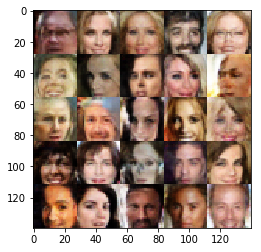

Epoch : 6/10 ... Step : 18100 ... d_loss : 0.2695339024066925 ... g_loss : 3.416088342666626
Epoch : 6/10 ... Step : 18200 ... d_loss : 0.2814989984035492 ... g_loss : 3.1790480613708496
Epoch : 6/10 ... Step : 18300 ... d_loss : 0.9074666500091553 ... g_loss : 5.14849853515625
Epoch : 6/10 ... Step : 18400 ... d_loss : 0.30773961544036865 ... g_loss : 4.046170711517334
Epoch : 6/10 ... Step : 18500 ... d_loss : 0.30610859394073486 ... g_loss : 4.413356781005859
Epoch : 6/10 ... Step : 18600 ... d_loss : 1.2482481002807617 ... g_loss : 2.0637271404266357
Epoch : 6/10 ... Step : 18700 ... d_loss : 0.39115846157073975 ... g_loss : 3.5438990592956543
Epoch : 6/10 ... Step : 18800 ... d_loss : 0.6940707564353943 ... g_loss : 2.3031558990478516
Epoch : 6/10 ... Step : 18900 ... d_loss : 0.21500104665756226 ... g_loss : 4.14189338684082
Epoch : 7/10 ... Step : 19000 ... d_loss : 0.3661699891090393 ... g_loss : 4.3759660720825195


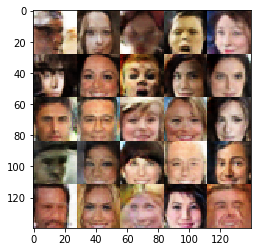

Epoch : 7/10 ... Step : 19100 ... d_loss : 0.7071528434753418 ... g_loss : 3.3849949836730957
Epoch : 7/10 ... Step : 19200 ... d_loss : 0.27790147066116333 ... g_loss : 3.8397059440612793
Epoch : 7/10 ... Step : 19300 ... d_loss : 0.38583359122276306 ... g_loss : 4.359880447387695
Epoch : 7/10 ... Step : 19400 ... d_loss : 1.1872444152832031 ... g_loss : 1.3505476713180542
Epoch : 7/10 ... Step : 19500 ... d_loss : 0.52000492811203 ... g_loss : 3.4369068145751953
Epoch : 7/10 ... Step : 19600 ... d_loss : 0.3557535409927368 ... g_loss : 3.2199294567108154
Epoch : 7/10 ... Step : 19700 ... d_loss : 0.2904711961746216 ... g_loss : 5.15902042388916
Epoch : 7/10 ... Step : 19800 ... d_loss : 1.636960506439209 ... g_loss : 8.877716064453125
Epoch : 7/10 ... Step : 19900 ... d_loss : 2.220370292663574 ... g_loss : 1.9596445560455322
Epoch : 7/10 ... Step : 20000 ... d_loss : 0.5225305557250977 ... g_loss : 3.0324621200561523


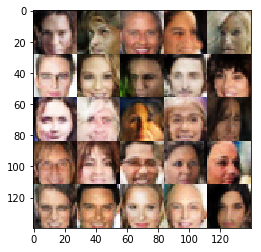

Epoch : 7/10 ... Step : 20100 ... d_loss : 0.7955620288848877 ... g_loss : 1.3638322353363037
Epoch : 7/10 ... Step : 20200 ... d_loss : 0.3061924874782562 ... g_loss : 4.405516624450684
Epoch : 7/10 ... Step : 20300 ... d_loss : 0.3211655914783478 ... g_loss : 4.232878684997559
Epoch : 7/10 ... Step : 20400 ... d_loss : 1.2649412155151367 ... g_loss : 1.2986468076705933
Epoch : 7/10 ... Step : 20500 ... d_loss : 0.5475189089775085 ... g_loss : 3.294623374938965
Epoch : 7/10 ... Step : 20600 ... d_loss : 0.4550027549266815 ... g_loss : 4.140321254730225
Epoch : 7/10 ... Step : 20700 ... d_loss : 0.7625323534011841 ... g_loss : 3.5628609657287598
Epoch : 7/10 ... Step : 20800 ... d_loss : 0.2218743860721588 ... g_loss : 3.974705457687378
Epoch : 7/10 ... Step : 20900 ... d_loss : 0.3717931807041168 ... g_loss : 4.583436012268066
Epoch : 7/10 ... Step : 21000 ... d_loss : 0.8192095756530762 ... g_loss : 2.687600612640381


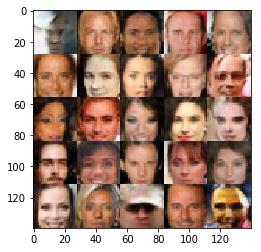

Epoch : 7/10 ... Step : 21100 ... d_loss : 0.623580813407898 ... g_loss : 4.868472099304199
Epoch : 7/10 ... Step : 21200 ... d_loss : 1.0972751379013062 ... g_loss : 1.2435379028320312
Epoch : 7/10 ... Step : 21300 ... d_loss : 1.1412360668182373 ... g_loss : 2.9949889183044434
Epoch : 7/10 ... Step : 21400 ... d_loss : 0.5461686849594116 ... g_loss : 3.1392970085144043
Epoch : 7/10 ... Step : 21500 ... d_loss : 0.38025012612342834 ... g_loss : 3.3059778213500977
Epoch : 7/10 ... Step : 21600 ... d_loss : 1.2774477005004883 ... g_loss : 1.0083229541778564
Epoch : 7/10 ... Step : 21700 ... d_loss : 0.4087792634963989 ... g_loss : 4.880535125732422
Epoch : 7/10 ... Step : 21800 ... d_loss : 0.7504922747612 ... g_loss : 4.991997718811035
Epoch : 7/10 ... Step : 21900 ... d_loss : 3.14534068107605 ... g_loss : 0.9757068157196045
Epoch : 7/10 ... Step : 22000 ... d_loss : 0.5753359198570251 ... g_loss : 3.2147979736328125


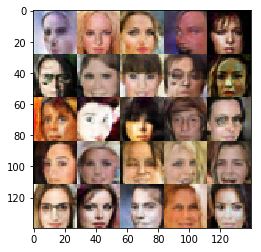

Epoch : 7/10 ... Step : 22100 ... d_loss : 1.4733750820159912 ... g_loss : 4.149021625518799
Epoch : 8/10 ... Step : 22200 ... d_loss : 0.25395452976226807 ... g_loss : 3.4134278297424316
Epoch : 8/10 ... Step : 22300 ... d_loss : 0.37968260049819946 ... g_loss : 3.0457379817962646
Epoch : 8/10 ... Step : 22400 ... d_loss : 0.5422947406768799 ... g_loss : 3.911689281463623
Epoch : 8/10 ... Step : 22500 ... d_loss : 0.4606148898601532 ... g_loss : 4.249947547912598
Epoch : 8/10 ... Step : 22600 ... d_loss : 0.18404912948608398 ... g_loss : 4.14982271194458
Epoch : 8/10 ... Step : 22700 ... d_loss : 0.5949870944023132 ... g_loss : 4.7815423011779785
Epoch : 8/10 ... Step : 22800 ... d_loss : 0.4282451868057251 ... g_loss : 2.850914239883423
Epoch : 8/10 ... Step : 22900 ... d_loss : 0.5931434035301208 ... g_loss : 5.224471569061279
Epoch : 8/10 ... Step : 23000 ... d_loss : 0.3509417474269867 ... g_loss : 4.103386402130127


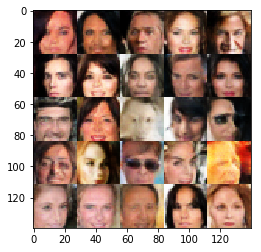

Epoch : 8/10 ... Step : 23100 ... d_loss : 0.4083268344402313 ... g_loss : 4.703277587890625
Epoch : 8/10 ... Step : 23200 ... d_loss : 0.7648941874504089 ... g_loss : 2.159581422805786
Epoch : 8/10 ... Step : 23300 ... d_loss : 0.7974314093589783 ... g_loss : 4.739001274108887
Epoch : 8/10 ... Step : 23400 ... d_loss : 0.39900290966033936 ... g_loss : 4.106310844421387
Epoch : 8/10 ... Step : 23500 ... d_loss : 0.5239807367324829 ... g_loss : 3.415222644805908
Epoch : 8/10 ... Step : 23600 ... d_loss : 0.2796063721179962 ... g_loss : 3.1567869186401367
Epoch : 8/10 ... Step : 23700 ... d_loss : 0.3090367913246155 ... g_loss : 3.54063081741333
Epoch : 8/10 ... Step : 23800 ... d_loss : 0.5435348749160767 ... g_loss : 3.941195487976074
Epoch : 8/10 ... Step : 23900 ... d_loss : 0.4103485345840454 ... g_loss : 4.36937141418457
Epoch : 8/10 ... Step : 24000 ... d_loss : 0.5792438387870789 ... g_loss : 2.911807060241699


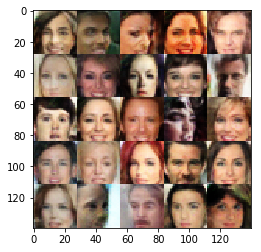

Epoch : 8/10 ... Step : 24100 ... d_loss : 0.30811288952827454 ... g_loss : 4.566879749298096
Epoch : 8/10 ... Step : 24200 ... d_loss : 0.7083595991134644 ... g_loss : 2.1919918060302734
Epoch : 8/10 ... Step : 24300 ... d_loss : 0.5555270314216614 ... g_loss : 3.1047685146331787
Epoch : 8/10 ... Step : 24400 ... d_loss : 0.7927849292755127 ... g_loss : 2.3599026203155518
Epoch : 8/10 ... Step : 24500 ... d_loss : 1.3078144788742065 ... g_loss : 6.797451972961426
Epoch : 8/10 ... Step : 24600 ... d_loss : 0.5142228007316589 ... g_loss : 4.588727951049805
Epoch : 8/10 ... Step : 24700 ... d_loss : 0.3275877833366394 ... g_loss : 3.71189284324646
Epoch : 8/10 ... Step : 24800 ... d_loss : 0.501152753829956 ... g_loss : 4.264185428619385
Epoch : 8/10 ... Step : 24900 ... d_loss : 0.20144537091255188 ... g_loss : 3.9159388542175293
Epoch : 8/10 ... Step : 25000 ... d_loss : 0.4248126745223999 ... g_loss : 3.785752296447754


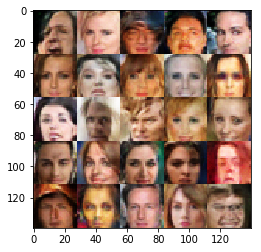

Epoch : 8/10 ... Step : 25100 ... d_loss : 0.4099251329898834 ... g_loss : 2.280766487121582
Epoch : 8/10 ... Step : 25200 ... d_loss : 0.9084678292274475 ... g_loss : 3.91361927986145
Epoch : 8/10 ... Step : 25300 ... d_loss : 1.0113188028335571 ... g_loss : 2.507631301879883
Epoch : 9/10 ... Step : 25400 ... d_loss : 0.36031487584114075 ... g_loss : 5.1182050704956055
Epoch : 9/10 ... Step : 25500 ... d_loss : 0.05344564467668533 ... g_loss : 7.011328220367432
Epoch : 9/10 ... Step : 25600 ... d_loss : 0.3123284578323364 ... g_loss : 4.889743328094482
Epoch : 9/10 ... Step : 25700 ... d_loss : 0.533519446849823 ... g_loss : 4.860894203186035
Epoch : 9/10 ... Step : 25800 ... d_loss : 0.08331054449081421 ... g_loss : 4.677060127258301
Epoch : 9/10 ... Step : 25900 ... d_loss : 0.6761173009872437 ... g_loss : 2.1354076862335205
Epoch : 9/10 ... Step : 26000 ... d_loss : 0.16820071637630463 ... g_loss : 3.905470132827759


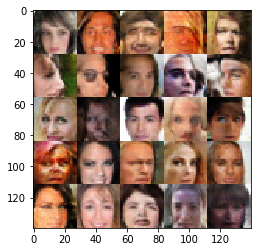

Epoch : 9/10 ... Step : 26100 ... d_loss : 0.29596367478370667 ... g_loss : 4.333805561065674
Epoch : 9/10 ... Step : 26200 ... d_loss : 0.43651095032691956 ... g_loss : 4.021414756774902
Epoch : 9/10 ... Step : 26300 ... d_loss : 0.5232959985733032 ... g_loss : 2.571570873260498
Epoch : 9/10 ... Step : 26400 ... d_loss : 0.9275932908058167 ... g_loss : 2.4451475143432617
Epoch : 9/10 ... Step : 26500 ... d_loss : 0.732362687587738 ... g_loss : 2.0951693058013916
Epoch : 9/10 ... Step : 26600 ... d_loss : 0.5919581651687622 ... g_loss : 1.7505412101745605
Epoch : 9/10 ... Step : 26700 ... d_loss : 1.2631993293762207 ... g_loss : 6.563183784484863
Epoch : 9/10 ... Step : 26800 ... d_loss : 0.5323549509048462 ... g_loss : 3.322566509246826
Epoch : 9/10 ... Step : 26900 ... d_loss : 0.21753285825252533 ... g_loss : 4.194251537322998
Epoch : 9/10 ... Step : 27000 ... d_loss : 0.5011434555053711 ... g_loss : 5.234610080718994


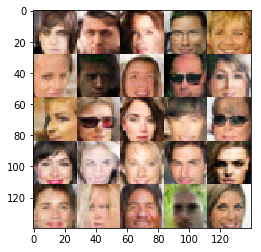

Epoch : 9/10 ... Step : 27100 ... d_loss : 0.6940739154815674 ... g_loss : 1.6781619787216187
Epoch : 9/10 ... Step : 27200 ... d_loss : 0.4003569483757019 ... g_loss : 3.2724404335021973
Epoch : 9/10 ... Step : 27300 ... d_loss : 0.10880632698535919 ... g_loss : 6.0382161140441895
Epoch : 9/10 ... Step : 27400 ... d_loss : 0.4500623941421509 ... g_loss : 4.10192346572876
Epoch : 9/10 ... Step : 27500 ... d_loss : 0.3227854073047638 ... g_loss : 4.521537780761719
Epoch : 9/10 ... Step : 27600 ... d_loss : 0.30751892924308777 ... g_loss : 3.2214925289154053
Epoch : 9/10 ... Step : 27700 ... d_loss : 0.812039852142334 ... g_loss : 5.79445743560791
Epoch : 9/10 ... Step : 27800 ... d_loss : 0.3711985647678375 ... g_loss : 3.206743001937866
Epoch : 9/10 ... Step : 27900 ... d_loss : 0.282046914100647 ... g_loss : 4.102575302124023
Epoch : 9/10 ... Step : 28000 ... d_loss : 0.5198266506195068 ... g_loss : 4.311180114746094


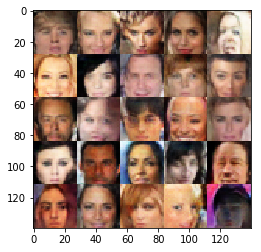

Epoch : 9/10 ... Step : 28100 ... d_loss : 0.7660457491874695 ... g_loss : 6.059112548828125
Epoch : 9/10 ... Step : 28200 ... d_loss : 1.2874704599380493 ... g_loss : 2.0908660888671875
Epoch : 9/10 ... Step : 28300 ... d_loss : 0.5435035824775696 ... g_loss : 3.196681499481201
Epoch : 9/10 ... Step : 28400 ... d_loss : 0.2556459307670593 ... g_loss : 5.736785888671875
Epoch : 10/10 ... Step : 28500 ... d_loss : 0.378069669008255 ... g_loss : 4.2180352210998535
Epoch : 10/10 ... Step : 28600 ... d_loss : 0.6158527135848999 ... g_loss : 4.70815372467041
Epoch : 10/10 ... Step : 28700 ... d_loss : 0.0896947979927063 ... g_loss : 4.471714973449707
Epoch : 10/10 ... Step : 28800 ... d_loss : 0.24882569909095764 ... g_loss : 3.7529296875
Epoch : 10/10 ... Step : 28900 ... d_loss : 0.8011612296104431 ... g_loss : 1.6903131008148193
Epoch : 10/10 ... Step : 29000 ... d_loss : 0.5015291571617126 ... g_loss : 3.4335780143737793


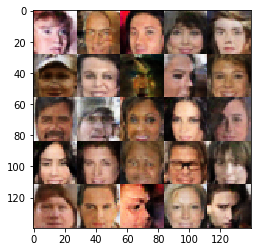

Epoch : 10/10 ... Step : 29100 ... d_loss : 0.4106074571609497 ... g_loss : 3.4274582862854004
Epoch : 10/10 ... Step : 29200 ... d_loss : 2.248307228088379 ... g_loss : 8.01930046081543
Epoch : 10/10 ... Step : 29300 ... d_loss : 0.2778056263923645 ... g_loss : 3.558537006378174
Epoch : 10/10 ... Step : 29400 ... d_loss : 0.3079754710197449 ... g_loss : 3.8532679080963135
Epoch : 10/10 ... Step : 29500 ... d_loss : 0.43863198161125183 ... g_loss : 4.669306755065918
Epoch : 10/10 ... Step : 29600 ... d_loss : 1.680667757987976 ... g_loss : 5.894677639007568
Epoch : 10/10 ... Step : 29700 ... d_loss : 0.33130979537963867 ... g_loss : 3.553741455078125
Epoch : 10/10 ... Step : 29800 ... d_loss : 0.18311983346939087 ... g_loss : 4.499373912811279
Epoch : 10/10 ... Step : 29900 ... d_loss : 0.5762640237808228 ... g_loss : 4.349750518798828
Epoch : 10/10 ... Step : 30000 ... d_loss : 0.17546240985393524 ... g_loss : 5.212212562561035


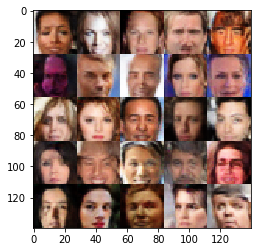

Epoch : 10/10 ... Step : 30100 ... d_loss : 0.10799669474363327 ... g_loss : 4.463862419128418
Epoch : 10/10 ... Step : 30200 ... d_loss : 0.5007672309875488 ... g_loss : 3.6731388568878174
Epoch : 10/10 ... Step : 30300 ... d_loss : 0.2675006687641144 ... g_loss : 4.114383697509766
Epoch : 10/10 ... Step : 30400 ... d_loss : 0.2227734923362732 ... g_loss : 4.130051612854004
Epoch : 10/10 ... Step : 30500 ... d_loss : 0.28389307856559753 ... g_loss : 4.81640625
Epoch : 10/10 ... Step : 30600 ... d_loss : 0.5074851512908936 ... g_loss : 3.6572933197021484
Epoch : 10/10 ... Step : 30700 ... d_loss : 0.6775749325752258 ... g_loss : 2.3551504611968994
Epoch : 10/10 ... Step : 30800 ... d_loss : 0.5641292333602905 ... g_loss : 4.442119598388672
Epoch : 10/10 ... Step : 30900 ... d_loss : 1.1315271854400635 ... g_loss : 1.7341861724853516
Epoch : 10/10 ... Step : 31000 ... d_loss : 0.2348896563053131 ... g_loss : 4.009011268615723


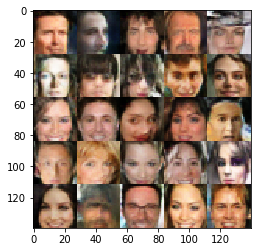

Epoch : 10/10 ... Step : 31100 ... d_loss : 0.9523839950561523 ... g_loss : 6.449118614196777
Epoch : 10/10 ... Step : 31200 ... d_loss : 0.3498571515083313 ... g_loss : 3.347778797149658
Epoch : 10/10 ... Step : 31300 ... d_loss : 0.39960625767707825 ... g_loss : 4.0286054611206055
Epoch : 10/10 ... Step : 31400 ... d_loss : 0.11098617315292358 ... g_loss : 4.664855003356934
Epoch : 10/10 ... Step : 31500 ... d_loss : 0.20356731116771698 ... g_loss : 4.337280750274658
Epoch : 10/10 ... Step : 31600 ... d_loss : 0.5650681257247925 ... g_loss : 2.6981019973754883


In [91]:
batch_size = 64
z_dim = 200
learning_rate = 1e-3
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.